In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
csv = pd.read_csv('aida_competition_1124.csv')

In [3]:
csv.head(10)

,Start,Diver,Nationality,Gender,Discipline,Line,Official Top,AP,RP,Card,Points,Remarks,Title Event,Event Type,Day
0,1,Deborah Andollo,CUB,F,CWT,NaN,00:00,61 m,61 m,WHITE,61.0,OK,WR Attempt - ANDOLLO Deborah (CWT),Worldrecord attempt,1994-06-12
1,1,Umberto Pelizzari,ITA,M,CWT,NaN,00:00,72 m,72 m,WHITE,72.0,OK,WR Attempt - PELIZZARI Umberto (CWT),Worldrecord attempt,1995-09-17
2,1,Deborah Andollo,CUB,F,CWT,NaN,00:00,62 m,62 m,WHITE,62.0,OK,WR Attempt - ANDOLLO Deborah,Worldrecord attempt,1996-10-05
3,1,Michael Oliva,FRA,M,CWT,NaN,00:00,72 m,72 m,WHITE,72.0,OK,WR Attempt - OLIVA Michael (CWT),Worldrecord attempt,1996-10-11
4,1,Alejandro Ravelo,CUB,M,CWT,NaN,00:00,73 m,73 m,WHITE,73.0,OK,WR Attempt - RAVELO Alejandro (CWT),Worldrecord attempt,1997-08-02
5,1,Umberto Pelizzari,ITA,M,CWT,NaN,00:00,75 m,75 m,WHITE,75.0,OK,WR Attempt - PELIZZARI Umberto (CWT),Worldrecord attempt,1997-09-13
6,1,Deborah Andollo,CUB,F,CWT,NaN,00:00,0 m,65 m,WHITE,65.0,OK,WR Attempt - ANDOLLO Deborah,Worldrecord attempt,1997-12-05
7,1,Alexandra Louzine,CZE,F,CWT,NaN,00:00,35 m,35 m,WHITE,35.0,OK,1998 WRA CWT Fresh Water by Alexandra Louzine,Worldrecord attempt,1998-09-06
8,1,Tanya Streeter,USA,F,CWT,NaN,00:00,67 m,67 m,WHITE,67.0,OK,WR Attempt - STREETER Tanya (CWT),Worldrecord attempt,1998-09-19
9,3,Andy Le Sauce,FRA,M,CWT,NaN,00:00,0 m,56 m,WHITE,56.0,OK,Compiled rankings for year 1999,Competition,1999-01-01


In [4]:
csv.dropna(inplace=True)

 Start : l’indice de départ de l’apnéiste dans la journée de compétition (peu
intéressant)
- Diver : le nom de l’apnéiste
- Nationality : le pays de l’apnéiste
- Gender : le genre de l’apnéiste H/F
- Discipline : la discipline concurrue (FIM: immersion libre, CNF: brasse, CWT: poids
constant libre souvent en monopalme, CWT-B: en by-palmes)
- Line : ligne de départ, très peu renseignée (peu intéressant)
- Official Top : l’heure officielle de son départ (peu intéressant?)
- AP : la profondeur annoncée, l’apnéiste doit annoncer la profondeur qu’il veut
effecter et l’effectuer pour valider un carton blanc
- Day : jour de la compétition
- Title Event : titre de la compétition
- Event Type : le type de l’événement

# Exploration des données (EDA)

In [5]:
# Suppression des colonnes Start, Line et Official Top car peu intéréssante pour étudier les facteurs
csv = csv.drop(['Start', 'Line', 'Official Top'], axis=1)
csv.rename(columns={'Diver': 'Name'}, inplace=True)

In [6]:
csv.head(10)

,Name,Nationality,Gender,Discipline,AP,RP,Card,Points,Remarks,Title Event,Event Type,Day
16376,Mario Mingo,ESP,M,FIM,45 m,45 m,WHITE,45.0,Ok,FREEDIVING ATLANTIC CUP 2018,Depth Competition,2018-11-10
16377,Jesper Lauridsen,DEN,M,FIM,55 m,55 m,WHITE,55.0,Ok,FREEDIVING ATLANTIC CUP 2018,Depth Competition,2018-11-10
16378,Cesar Bettencourt,POR,M,FIM,65 m,65 m,WHITE,65.0,Ok,FREEDIVING ATLANTIC CUP 2018,Depth Competition,2018-11-10
16379,Cosmi Noguera,ESP,M,FIM,65 m,54 m,YELLOW,42.0,Pen,FREEDIVING ATLANTIC CUP 2018,Depth Competition,2018-11-10
16380,Borys Bajorek,POL,M,CWT,40 m,40 m,WHITE,40.0,Ok,FREEDIVING ATLANTIC CUP 2018,Depth Competition,2018-11-10
16381,Jacek Polak,POL,M,CWT,56 m,56 m,WHITE,56.0,Ok,FREEDIVING ATLANTIC CUP 2018,Depth Competition,2018-11-10
16382,Jessea Wenjie Lu,CHN,F,CWT,75 m,75 m,WHITE,75.0,Ok,FREEDIVING ATLANTIC CUP 2018,Depth Competition,2018-11-10
16383,Luis Farina Rodriguez,ESP,M,CWT,80 m,78 m,RED,0.0,"No tag,rp<ap,dqother",FREEDIVING ATLANTIC CUP 2018,Depth Competition,2018-11-10
16384,Maja Wisniewska,POL,F,CWT,43 m,43 m,WHITE,43.0,Ok,FREEDIVING ATLANTIC CUP 2018,Depth Competition,2018-11-10
16398,Jacek Polak,POL,M,FIM,50 m,50 m,WHITE,50.0,Ok,FREEDIVING ATLANTIC CUP 2018,Depth Competition,2018-11-11


Les outputs sont RP, Card, Points et Remarks.

In [7]:
# Récupération des nombres à l'aide d'une régular expresssion. '\d+' ce sont les str avec digits (cad les chiffres/nombres)

csv['AP'] = csv.AP.str.extract(r'(\d+)') 
csv['RP'] = csv.RP.str.extract(r'(\d+)')

# On change les types des nombres pour les avoir en float et on transforme les dates en type datetime
csv.AP = csv.AP.astype(float)
csv.RP = csv.RP.astype(float)
csv.Day = pd.to_datetime(csv.Day)

In [8]:
# On vérifie le type 
csv.dtypes

Name                   object
Nationality            object
Gender                 object
Discipline             object
AP                    float64
RP                    float64
Card                   object
Points                float64
Remarks                object
Title Event            object
Event Type             object
Day            datetime64[ns]
dtype: object

In [9]:
# We sort the data by name
csv = csv.sort_values(by=['Name', 'Day'])
csv.head(10)


,Name,Nationality,Gender,Discipline,AP,RP,Card,Points,Remarks,Title Event,Event Type,Day
17239,Abdelatif Alouach,FRA,M,CNF,72.0,72.0,YELLOW,67.0,Other,NICE ABYSS CONTEST 2019,Depth Competition,2019-06-22
17268,Abdelatif Alouach,FRA,M,CWT,95.0,95.0,WHITE,95.0,Ok,NICE ABYSS CONTEST 2019,Depth Competition,2019-06-23
18077,Abdelatif Alouach,FRA,M,CNF,83.0,83.0,WHITE,83.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-09
18118,Abdelatif Alouach,FRA,M,FIM,111.0,111.0,WHITE,111.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-11
18213,Abdelatif Alouach,FRA,M,CWT,110.0,110.0,WHITE,110.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-13
20613,Abdelatif Alouach,FRA,M,CNF,70.0,70.0,WHITE,70.0,Ok,NAC AIDA 2021,Depth Competition,2021-06-19
20632,Abdelatif Alouach,FRA,M,CWTB,105.0,105.0,WHITE,105.0,Ok,NAC AIDA 2021,Depth Competition,2021-06-20
21362,Abdelatif Alouach,FRA,M,CWTB,111.0,111.0,WHITE,111.0,Ok,Depth World Championship,Depth Competition,2021-09-23
21488,Abdelatif Alouach,FRA,M,FIM,111.0,111.0,WHITE,111.0,Ok,Depth World Championship,Depth Competition,2021-09-25
21538,Abdelatif Alouach,FRA,M,CNF,78.0,78.0,WHITE,78.0,Ok,Depth World Championship,Depth Competition,2021-09-27


In [10]:
# If we don't do this, the index by default isn't still good
csv.reset_index(drop=True, inplace=True)
csv.head(10)

,Name,Nationality,Gender,Discipline,AP,RP,Card,Points,Remarks,Title Event,Event Type,Day
0,Abdelatif Alouach,FRA,M,CNF,72.0,72.0,YELLOW,67.0,Other,NICE ABYSS CONTEST 2019,Depth Competition,2019-06-22
1,Abdelatif Alouach,FRA,M,CWT,95.0,95.0,WHITE,95.0,Ok,NICE ABYSS CONTEST 2019,Depth Competition,2019-06-23
2,Abdelatif Alouach,FRA,M,CNF,83.0,83.0,WHITE,83.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-09
3,Abdelatif Alouach,FRA,M,FIM,111.0,111.0,WHITE,111.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-11
4,Abdelatif Alouach,FRA,M,CWT,110.0,110.0,WHITE,110.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-13
5,Abdelatif Alouach,FRA,M,CNF,70.0,70.0,WHITE,70.0,Ok,NAC AIDA 2021,Depth Competition,2021-06-19
6,Abdelatif Alouach,FRA,M,CWTB,105.0,105.0,WHITE,105.0,Ok,NAC AIDA 2021,Depth Competition,2021-06-20
7,Abdelatif Alouach,FRA,M,CWTB,111.0,111.0,WHITE,111.0,Ok,Depth World Championship,Depth Competition,2021-09-23
8,Abdelatif Alouach,FRA,M,FIM,111.0,111.0,WHITE,111.0,Ok,Depth World Championship,Depth Competition,2021-09-25
9,Abdelatif Alouach,FRA,M,CNF,78.0,78.0,WHITE,78.0,Ok,Depth World Championship,Depth Competition,2021-09-27


In [11]:
csv.shape

(7913, 12)

In [12]:
# Supprime les lignes avec des Nan et les doublons pour éviter de fausser les résultats
# inplace permet de modifier les datas actuelle et de ne pas recréer un csv
csv.dropna(how='all', inplace=True)
csv.drop_duplicates(inplace=True)
csv.shape

(7913, 12)

In [13]:
csv.dtypes

Name                   object
Nationality            object
Gender                 object
Discipline             object
AP                    float64
RP                    float64
Card                   object
Points                float64
Remarks                object
Title Event            object
Event Type             object
Day            datetime64[ns]
dtype: object

In [14]:
csv.describe(include=[object])


,Name,Nationality,Gender,Discipline,Card,Remarks,Title Event,Event Type
count,7913,7913,7913,7913,7913,7913,7913,7913
unique,1760,94,2,4,3,144,170,3
top,Omar Al Ghailani,KOR,M,CWTB,WHITE,Ok,Depth World Championship,Depth Competition
freq,45,1336,4734,2440,5579,5579,1457,7346


In [15]:
csv.describe()

,AP,RP,Points,Day
count,7913.00000,7913.000000,7913.000000,7913
mean,60.37015,57.599267,48.521471,2022-12-08 07:05:17.098445568
min,0.00000,0.000000,0.000000,2018-11-10 00:00:00
25%,44.00000,41.000000,30.000000,2022-03-22 00:00:00
50%,60.00000,56.000000,50.000000,2023-05-19 00:00:00
75%,75.00000,73.000000,68.000000,2023-11-05 00:00:00
max,136.00000,136.000000,136.000000,2024-11-03 00:00:00
std,21.99305,22.311808,28.119672,NaN


### 1) Distribution du nombre de plongée par année

In [16]:
# We create a column woh collect the year of diving
csv['Year'] = csv['Day'].dt.year
discipline_per_year = csv.groupby('Year')['Discipline'].count()

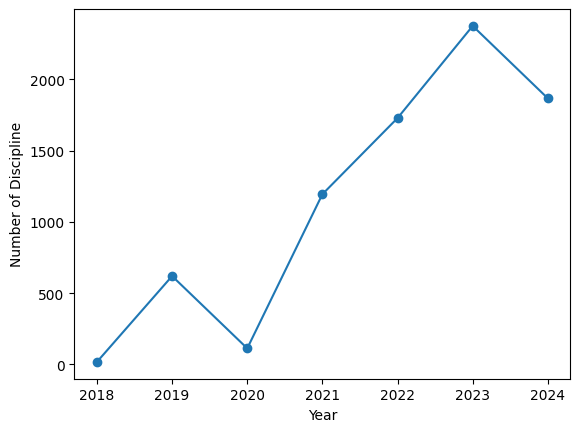

In [17]:
plt.plot(discipline_per_year.index, discipline_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Discipline')
plt.show()

- **Contexte** : Suivre l'évolution du nombre total de plongées au fil des années.
- **Axes** :
  - Axe X : Années.
  - Axe Y : Nombre de plongées.
- **Observations** :
  - Une augmentation du nombre de plongées au fil des années, indiquant la popularité croissante du sport.
  - Des baisses ponctuelles peuvent correspondre à des événements majeurs impactant les compétitions (par exemple, pandémie).
- **Lien avec le problème** :
  - Identifier les années avec une forte activité peut expliquer des variations de résultats.

### 2) la distribution du nombre d’apnéistes par année / par genre / par nationalité

**Année**

In [18]:
freediver_per_year = csv.groupby(by="Year")['Name'].count()

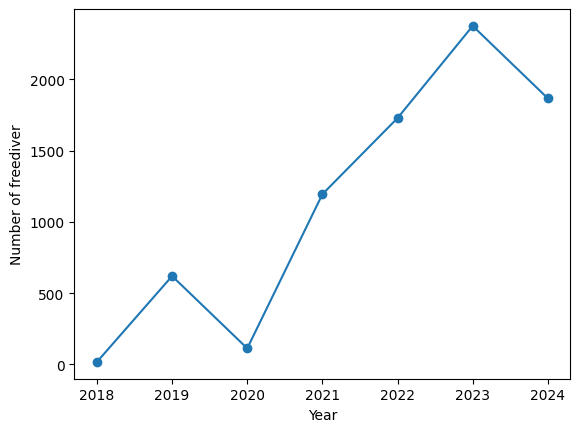

In [19]:
# It' exacly the same, it's normal because if we don't have freediver, we don't have diver.
plt.plot(freediver_per_year.index, freediver_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of freediver')
plt.show()


- **Contexte** : Analyse de l'évolution du nombre d'apnéistes uniques chaque année.
- **Axes** :
  - Axe X : Années.
  - Axe Y : Nombre d'apnéistes uniques.
- **Observations** :
  - Une corrélation avec la distribution des plongées : plus de participants entraînent davantage de plongées.
- **Lien avec le problème** :
  - Comprendre comment la participation peut influencer les résultats.


**Genre**

In [20]:
freediver_per_gender = csv.groupby(['Gender'])['Name'].count()

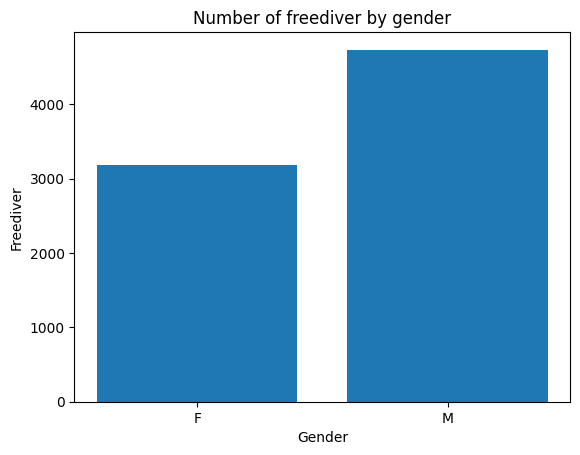

In [21]:
plt.bar(freediver_per_gender.index, freediver_per_gender.values)
plt.title("Number of freediver by gender")
plt.xlabel('Gender')
plt.ylabel('Freediver')
plt.show()


- **Contexte** : Comparaison entre le nombre d'hommes et de femmes participant aux compétitions.
- **Axes** :
  - Axe X : Genre (H/F).
  - Axe Y : Nombre d'apnéistes.
- **Observations** :
  - Un éventuel déséquilibre entre hommes et femmes peut refléter des différences de participation ou d'accès.
- **Lien avec le problème** :
  - Analyse utile pour détecter d’éventuels biais liés au genre.


**Nationalité**

In [22]:
nationality = csv.groupby(by='Nationality')['Name'].count()
# Fonction pour afficher les pourcentages seulement s'ils sont au-dessus du seuil 
def autopct_function(pct): 
    return ('%.2f%%' % pct) if pct > 3 else ''

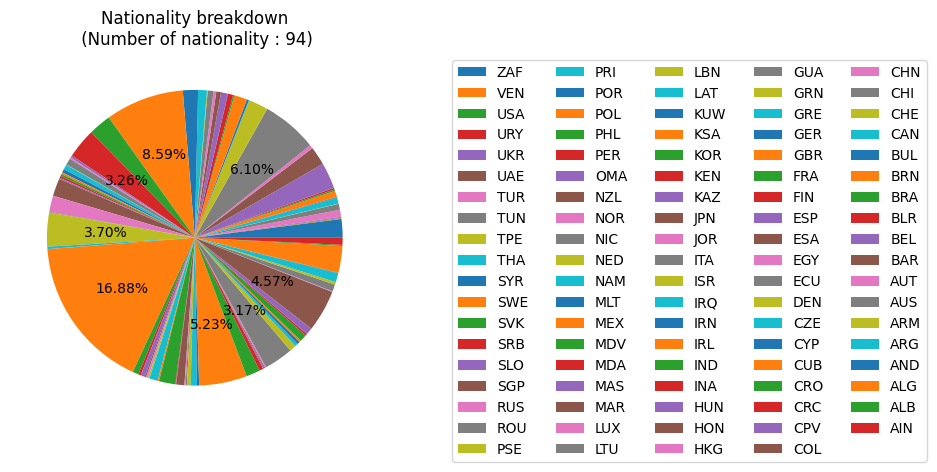

In [23]:
plt.pie(nationality, autopct=autopct_function)
plt.legend(nationality.index.sort_values(ascending=False), loc='upper right', bbox_to_anchor=(2,0.5, 0.5, 0.5), ncol=5 )
plt.title(f'''Nationality breakdown\n (Number of nationality : {len(csv['Nationality'].unique())})''')
plt.show()

- **Contexte** : Identifier les nationalités les plus représentées parmi les apnéistes.
- **Axes** :
  - Axe X : Nationalités.
  - Axe Y : Pourcentage ou nombre d'apnéistes.
- **Observations** :
  - Les pays les plus représentés peuvent avoir des traditions ou des infrastructures favorisant l’apnée.
- **Lien avec le problème** :
  - Comparer les performances selon les origines des plongeurs.


### 3) La distribution du nombre de cartons blancs / jaunes / rouges par discipline et par année

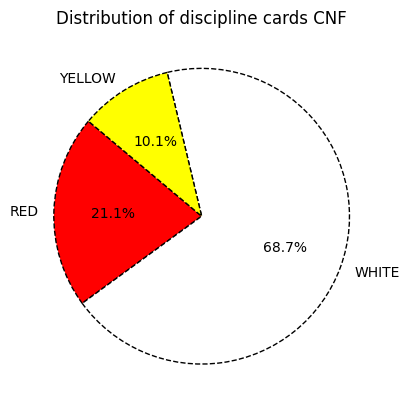

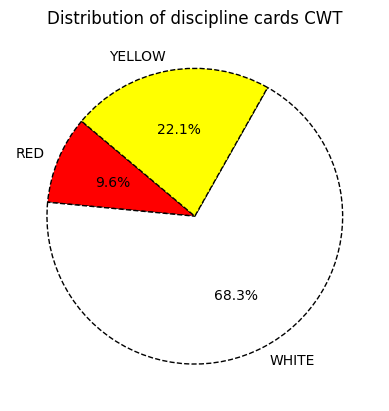

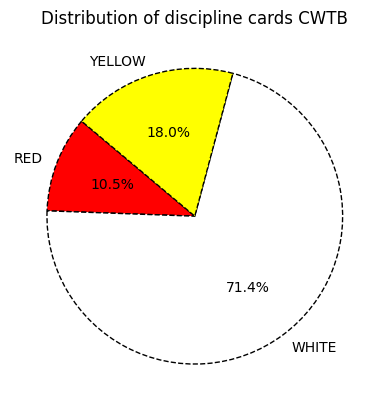

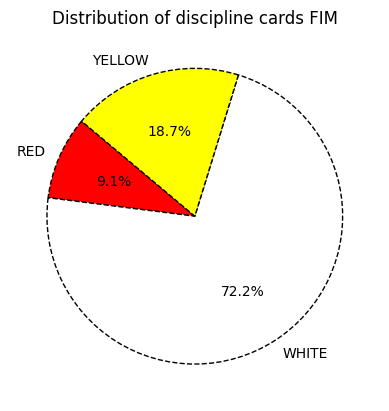

In [24]:
card_discipline = csv.groupby(['Card', 'Discipline'])['Card'].count()

# Collect all Discipline in the result
disciplines = card_discipline.index.get_level_values('Discipline').unique()

# We iter to create a pie by card
# Itération sur chaque discipline pour créer un pie chart
for discipline in disciplines:
    #  xs is a filter that allow to select data with multi-index
    data = card_discipline.xs(discipline, level='Discipline')
    # Creation of pie chart
    plt.figure()
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=['red', 'white','yellow'], wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed'})
    plt.title(f'Distribution of discipline cards {discipline}')
    plt.show()

1) - **Contexte** : Proportion de cartons blancs, jaunes et rouges pour CNF (Constant Weight No Fins)
- **Observations** :
  - Taux de succès relativement élevé (68.7% de cartons blancs).
  - Les cartons rouges (21.1%) signalent des difficultés techniques dans cette discipline.

2) - **Contexte** : Proportion de cartons pour CWT (Constant Weight)
- **Observations** :
  - Les cartons jaunes (22.1%) sont plus fréquents, suggérant des difficultés à atteindre la profondeur annoncée.
  - Les cartons rouges sont peu fréquents (9.6%).

3) - **Contexte** : Analyse des cartons pour CWTB (Constant Weight Bi-Fins)
- **Observations** :
  - Taux de cartons blancs le plus élevé (71.4%), montrant que cette discipline est plus accessible.

4) - **Contexte** : Répartition des cartons dans FIM (Free Immersion)
- **Observations** :
  - FIM affiche la meilleure performance globale (72.2% de cartons blancs, seulement 9.1% de rouges).

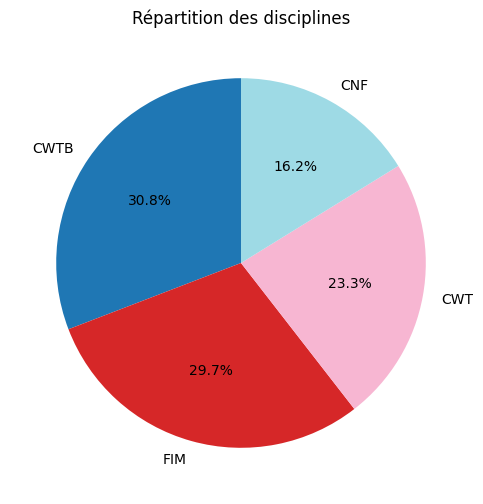

In [25]:
# Distribution of disciplines
discipline_counts = csv['Discipline'].value_counts()

fig, axes = plt.subplots(1, 1, figsize=(15, 6))

# Distribution of disciplines
discipline_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab20')
axes.set_title('Répartition des disciplines')
axes.set_ylabel('')
plt.show()



- **Contexte** : Visualiser la proportion des différentes disciplines pratiquées par les apnéistes.
- **Axes** :
  - Graphique circulaire (aucun axe X ou Y spécifique).
  - Les proportions sont exprimées en pourcentage.
- **Données utilisées** : Nombre total d'observations pour chaque discipline (`CNF`, `CWT`, `CWTB`, `FIM`).
- **Observations** :
  - La discipline **CWTB (Constant Weight Bi-Fins)** est la plus pratiquée (30.8%).
  - **FIM (Free Immersion)** suit de près avec 29.7%.
  - **CWT (Constant Weight)** représente 23.3%.
  - **CNF (Constant Weight No Fins)** est la moins pratiquée, avec 16.2%.
- **Lien avec le problème** :
  - Permet de comprendre quelles disciplines dominent dans le dataset, ce qui pourrait influencer la modélisation ou les analyses spécifiques.


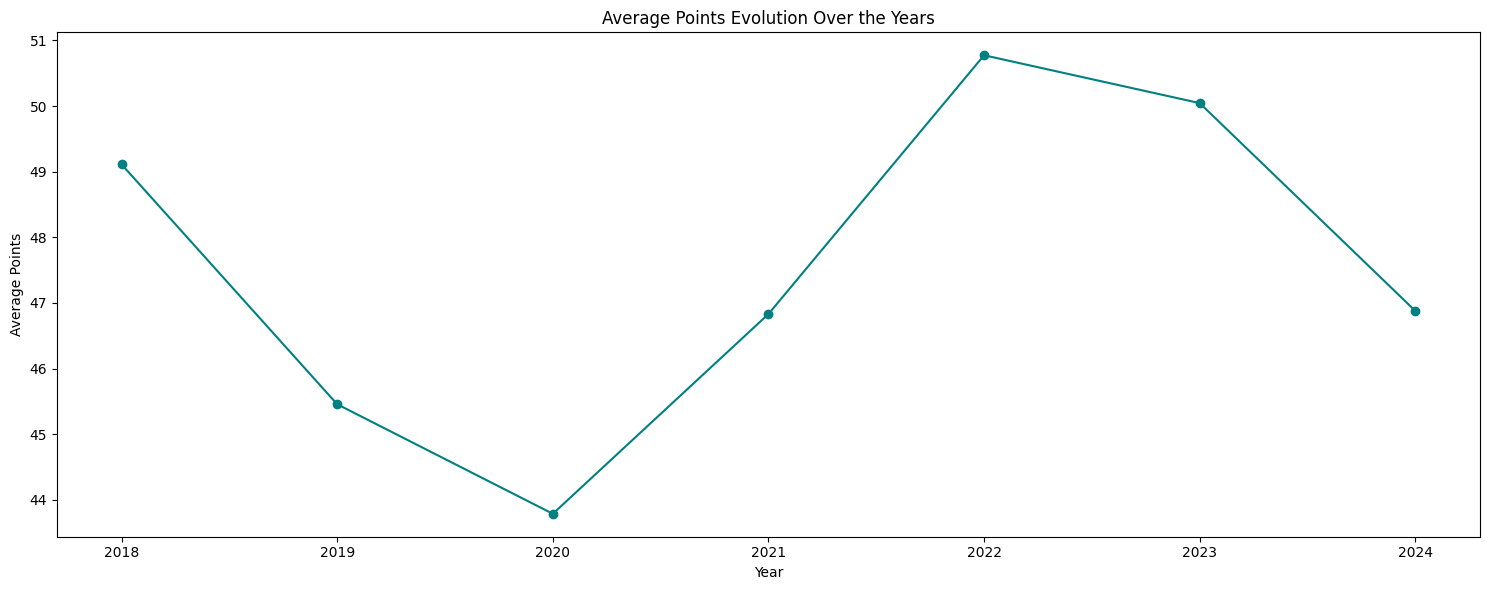

In [26]:
# Average points evolution over the years
average_points_by_year = csv.groupby('Year')['Points'].mean()

fig, axes = plt.subplots(1, 1, figsize=(15, 6))
average_points_by_year.plot(kind='line', marker='o', color='teal')

axes.set_title('Average Points Evolution Over the Years')
axes.set_xlabel('Year')
axes.set_ylabel('Average Points')

plt.tight_layout()
plt.show()

- **Contexte** : Ce graphique montre l'évolution des points moyens obtenus par les participants de 2018 à 2024.
- **Axes** :
  - Axe X : Années.
  - Axe Y : Moyenne des points obtenus.
- **Observations** :
  - Les points moyens ont diminué entre 2018 et 2020, atteignant un minimum en 2020.
  - Une augmentation significative est visible entre 2021 et 2022, suivie d’une légère baisse en 2023.
- **Lien avec le problème** :
  - Cela peut indiquer des variations dans le niveau de compétition ou les critères d’évaluation au fil des ans.


### Creation of  columns : month, experience_dive and experience_discipline

In [27]:
csv['month'] = csv['Day'].dt.month


In [28]:
#By default, cumcount star by 0, it's count by the number of occurence by the order
csv['experience_dive'] = csv.groupby('Name').cumcount() +1

In [29]:
csv['experience_discipline'] = csv.groupby(['Name','Discipline']).cumcount() +1

In [30]:
csv.head(3)

,Name,Nationality,Gender,Discipline,AP,RP,Card,Points,Remarks,Title Event,Event Type,Day,Year,month,experience_dive,experience_discipline
0,Abdelatif Alouach,FRA,M,CNF,72.0,72.0,YELLOW,67.0,Other,NICE ABYSS CONTEST 2019,Depth Competition,2019-06-22,2019,6,1,1
1,Abdelatif Alouach,FRA,M,CWT,95.0,95.0,WHITE,95.0,Ok,NICE ABYSS CONTEST 2019,Depth Competition,2019-06-23,2019,6,2,1
2,Abdelatif Alouach,FRA,M,CNF,83.0,83.0,WHITE,83.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-09,2019,9,3,2


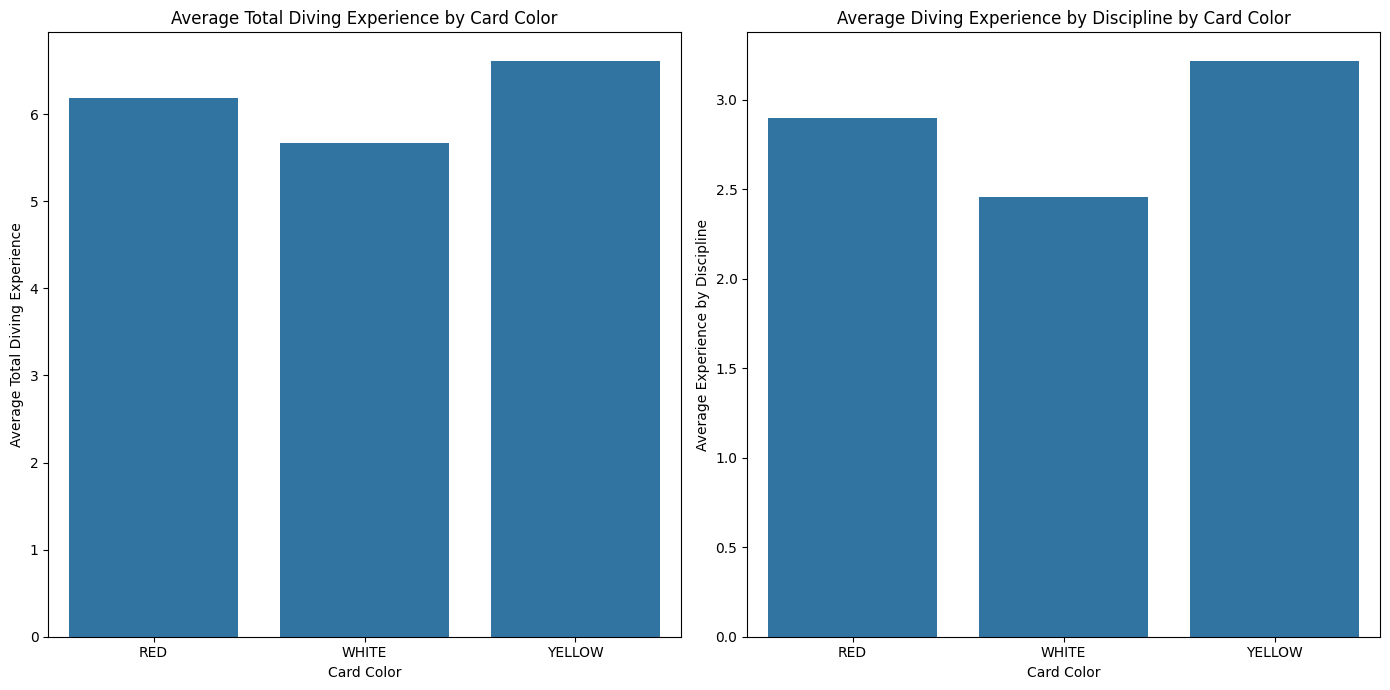

In [ ]:
# Bar Chart for average experience per card color
plt.figure(figsize=(14, 7))

average_experience = csv.groupby('Card')[['experience_dive', 'experience_discipline']].mean()

plt.subplot(1, 2, 1)
sns.barplot(x='Card', y='experience_dive', data=average_experience)
plt.title('Average Total Diving Experience by Card Color')
plt.xlabel('Card Color')
plt.ylabel('Average Total Diving Experience')

plt.subplot(1, 2, 2)
sns.barplot(x='Card', y='experience_discipline', data=average_experience)
plt.title('Average Diving Experience by Discipline by Card Color')
plt.xlabel('Card Color')
plt.ylabel('Average Experience by Discipline')

plt.tight_layout()
plt.show()

- **Contexte** : Visualisation des expériences moyennes totales et spécifiques par couleur de carton (rouge, blanc, jaune).
- **Graphique 1 : Expérience totale moyenne** :
  - Les participants ayant reçu des cartons jaunes ont l'expérience moyenne la plus élevée.
  - Les cartons blancs sont associés à une expérience légèrement inférieure aux cartons rouges.
- **Graphique 2 : Expérience par discipline moyenne** :
  - Les cartons jaunes présentent également une expérience par discipline plus élevée.
  - Les cartons rouges ont une expérience par discipline modérée, tandis que les cartons blancs sont les plus faibles.
- **Lien avec le problème** :
  - Cela illustre une potentielle corrélation entre expérience et type de carton reçu.


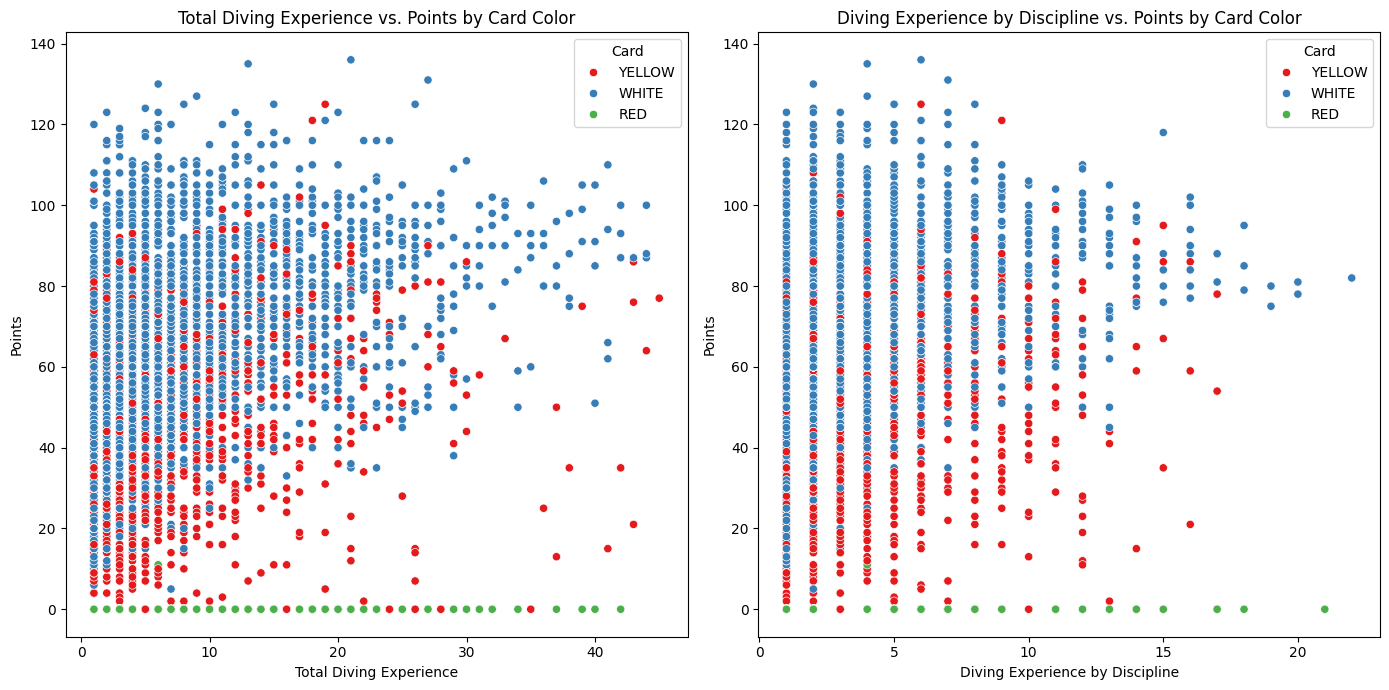

In [32]:
# Scatter Plot for experience vs points with card color
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x='experience_dive', y='Points', hue='Card', data=csv, palette='Set1',)
plt.title('Total Diving Experience vs. Points by Card Color')
plt.xlabel('Total Diving Experience')
plt.ylabel('Points')

plt.subplot(1, 2, 2)
sns.scatterplot(x='experience_discipline', y='Points', hue='Card', data=csv, palette='Set1')
plt.title('Diving Experience by Discipline vs. Points by Card Color')
plt.xlabel('Diving Experience by Discipline')
plt.ylabel('Points')

plt.tight_layout()
plt.show()

- **Contexte** : Ces graphiques analysent la relation entre l’expérience (totale et par discipline) et les points obtenus, selon la couleur de carton.
- **Graphique gauche : Expérience totale vs Points** :
  - Les cartons bleu dominent dans la zone des scores élevés.
  - Les cartons rouges sont plus fréquents pour les expériences plus faibles et les scores bas.
- **Graphique droit : Expérience par discipline vs Points** :
  - Une tendance similaire est observée, où les cartons blancs occupent les zones de scores élevés.
- **Lien avec le problème** :
  - Fournit des insights sur la relation entre la performance (points) et l'expérience, stratifiée par type de carton.


## Creation of the dataframe for learning

In [33]:
df = pd.DataFrame()

In [34]:
csv

,Name,Nationality,Gender,Discipline,AP,RP,Card,Points,Remarks,Title Event,Event Type,Day,Year,month,experience_dive,experience_discipline
0,Abdelatif Alouach,FRA,M,CNF,72.0,72.0,YELLOW,67.0,Other,NICE ABYSS CONTEST 2019,Depth Competition,2019-06-22,2019,6,1,1
1,Abdelatif Alouach,FRA,M,CWT,95.0,95.0,WHITE,95.0,Ok,NICE ABYSS CONTEST 2019,Depth Competition,2019-06-23,2019,6,2,1
2,Abdelatif Alouach,FRA,M,CNF,83.0,83.0,WHITE,83.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-09,2019,9,3,2
3,Abdelatif Alouach,FRA,M,FIM,111.0,111.0,WHITE,111.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-11,2019,9,4,1
4,Abdelatif Alouach,FRA,M,CWT,110.0,110.0,WHITE,110.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-13,2019,9,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7908,Ícaro Do Valle,BRA,M,CNF,61.0,61.0,RED,0.0,Dqsp,AIDA Colombian Cup 2024,Mixed Competition,2024-05-01,2024,5,1,1
7909,Ícaro Do Valle,BRA,M,CWTB,65.0,65.0,WHITE,65.0,Ok,AIDA Colombian Cup 2024,Mixed Competition,2024-05-02,2024,5,2,1
7910,Ícaro Do Valle,BRA,M,FIM,65.0,65.0,WHITE,65.0,Ok,AIDA Colombian Cup 2024,Mixed Competition,2024-05-05,2024,5,3,1
7911,보걸 강,KOR,M,CWTB,45.0,45.0,WHITE,45.0,Ok,10TH AIDA PANGLAO DEPTH GAMES May 2023,Depth Competition,2023-05-24,2023,5,1,1


a) We select the import data for the next part

In [35]:
df[['AP', 'Nationality', 'Gender', 'Discipline', 'experience_dive', 'experience_discipline', 'Points']] = csv[['AP', 'Nationality', 'Gender', 'Discipline','experience_dive', 'experience_discipline', 'Points']]

b) We initialyse the target column

In [36]:
df['target'] = csv['Card']

In [37]:
df

,AP,Nationality,Gender,Discipline,experience_dive,experience_discipline,Points,target
0,72.0,FRA,M,CNF,1,1,67.0,YELLOW
1,95.0,FRA,M,CWT,2,1,95.0,WHITE
2,83.0,FRA,M,CNF,3,2,83.0,WHITE
3,111.0,FRA,M,FIM,4,1,111.0,WHITE
4,110.0,FRA,M,CWT,5,2,110.0,WHITE
...,...,...,...,...,...,...,...,...
7908,61.0,BRA,M,CNF,1,1,0.0,RED
7909,65.0,BRA,M,CWTB,2,1,65.0,WHITE
7910,65.0,BRA,M,FIM,3,1,65.0,WHITE
7911,45.0,KOR,M,CWTB,1,1,45.0,WHITE


## Creation of the dataframe for learning

In [38]:
df = pd.DataFrame()

In [39]:
csv

,Name,Nationality,Gender,Discipline,AP,RP,Card,Points,Remarks,Title Event,Event Type,Day,Year,month,experience_dive,experience_discipline
0,Abdelatif Alouach,FRA,M,CNF,72.0,72.0,YELLOW,67.0,Other,NICE ABYSS CONTEST 2019,Depth Competition,2019-06-22,2019,6,1,1
1,Abdelatif Alouach,FRA,M,CWT,95.0,95.0,WHITE,95.0,Ok,NICE ABYSS CONTEST 2019,Depth Competition,2019-06-23,2019,6,2,1
2,Abdelatif Alouach,FRA,M,CNF,83.0,83.0,WHITE,83.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-09,2019,9,3,2
3,Abdelatif Alouach,FRA,M,FIM,111.0,111.0,WHITE,111.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-11,2019,9,4,1
4,Abdelatif Alouach,FRA,M,CWT,110.0,110.0,WHITE,110.0,Ok,AIDA Depth World Championship 2019,World Championship,2019-09-13,2019,9,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7908,Ícaro Do Valle,BRA,M,CNF,61.0,61.0,RED,0.0,Dqsp,AIDA Colombian Cup 2024,Mixed Competition,2024-05-01,2024,5,1,1
7909,Ícaro Do Valle,BRA,M,CWTB,65.0,65.0,WHITE,65.0,Ok,AIDA Colombian Cup 2024,Mixed Competition,2024-05-02,2024,5,2,1
7910,Ícaro Do Valle,BRA,M,FIM,65.0,65.0,WHITE,65.0,Ok,AIDA Colombian Cup 2024,Mixed Competition,2024-05-05,2024,5,3,1
7911,보걸 강,KOR,M,CWTB,45.0,45.0,WHITE,45.0,Ok,10TH AIDA PANGLAO DEPTH GAMES May 2023,Depth Competition,2023-05-24,2023,5,1,1


a) We select the import data for the next part

In [40]:
df[['AP', 'Nationality', 'Gender', 'Discipline', 'experience_dive', 'experience_discipline', 'Points']] = csv[['AP', 'Nationality', 'Gender', 'Discipline','experience_dive', 'experience_discipline', 'Points']]

b) We initialyse the target column

In [41]:
df['target'] = csv['Card']

In [42]:
df

,AP,Nationality,Gender,Discipline,experience_dive,experience_discipline,Points,target
0,72.0,FRA,M,CNF,1,1,67.0,YELLOW
1,95.0,FRA,M,CWT,2,1,95.0,WHITE
2,83.0,FRA,M,CNF,3,2,83.0,WHITE
3,111.0,FRA,M,FIM,4,1,111.0,WHITE
4,110.0,FRA,M,CWT,5,2,110.0,WHITE
...,...,...,...,...,...,...,...,...
7908,61.0,BRA,M,CNF,1,1,0.0,RED
7909,65.0,BRA,M,CWTB,2,1,65.0,WHITE
7910,65.0,BRA,M,FIM,3,1,65.0,WHITE
7911,45.0,KOR,M,CWTB,1,1,45.0,WHITE


## Clustering

1) Transformation of the data

In [43]:
# Collect the index number of Discipline
index = df.columns.get_loc('Discipline')
# Insert the new column at index+1 of Discipline
df.insert(index + 1, 'Discipline_codes',  df['Discipline'].astype('category').cat.codes)


In [44]:
# Collect the index number of Discipline
index = df.columns.get_loc('Nationality')
# Insert the new column at index+1 of Discipline
df.insert(index + 1, 'Nationality_codes',  df['Nationality'].astype('category').cat.codes)


In [45]:
# Collect the index number of Discipline
index = df.columns.get_loc('Gender')
# Insert the new column at index+1 of Discipline
df.insert(index + 1, 'Gender_codes',  df['Gender'].astype('category').cat.codes)


In [ ]:
from sklearn.preprocessing import StandardScaler


# Normalize numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## 3.1) Target = RED

In [47]:
csv['Points']

0        67.0
1        95.0
2        83.0
3       111.0
4       110.0
        ...  
7908      0.0
7909     65.0
7910     65.0
7911     45.0
7912     30.0
Name: Points, Length: 7913, dtype: float64

### KMeans

In [48]:
df_red_means = df[df['target'] == 'RED'].drop('target', axis=1)


In [49]:
df_red_means = df_red_means.drop(columns='Nationality')
df_red_means = df_red_means.drop(columns='Gender')
df_red_means = df_red_means.drop(columns='Discipline')

In [50]:
df_red_means

,AP,Nationality_codes,Gender_codes,Discipline_codes,experience_dive,experience_discipline,Points
20,1.165435,-0.629913,0.819466,-1.651359,2.355876,2.102717,-1.725644
28,1.938455,-0.629913,0.819466,0.246978,3.603837,1.317757,-1.725644
31,-1.244570,-0.792505,0.819466,1.196146,-0.608032,-0.644643,-1.725644
32,-1.244570,-0.792505,0.819466,-0.702190,-0.452037,-0.644643,-1.725644
39,0.255999,0.264343,0.819466,-0.702190,-0.296042,-0.644643,-1.725644
...,...,...,...,...,...,...,...
7868,0.483358,-1.198985,0.819466,-1.651359,0.171944,0.925277,-1.725644
7872,1.347322,1.565079,0.819466,1.196146,-0.608032,-0.252163,-1.725644
7897,-0.016831,-1.198985,0.819466,0.246978,-0.764027,-0.644643,-1.725644
7898,-0.016831,-1.198985,0.819466,0.246978,-0.608032,-0.252163,-1.725644


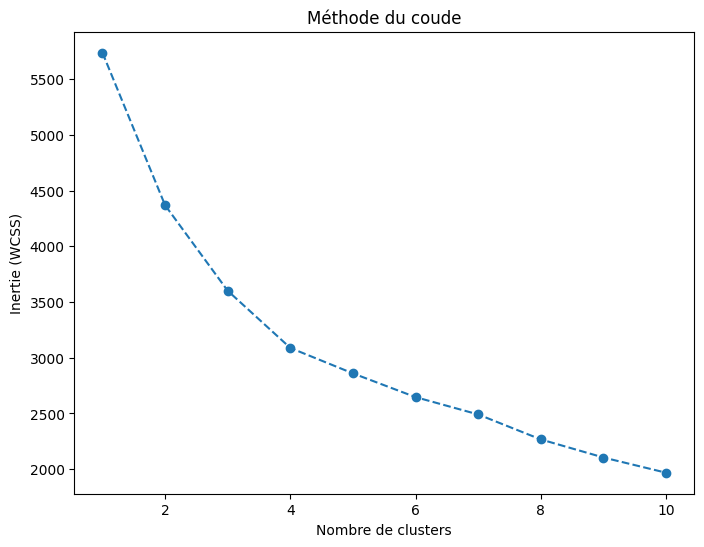

In [51]:
from sklearn.cluster import KMeans

# We're looking for the optimal number of clusters with the Elbow method
wcss = []
clusters = list(range(1, 11))

for numbers_clusters in clusters:
    mod = KMeans(n_clusters=numbers_clusters, random_state=42)
    mod.fit(df_red_means)
    wcss.append(mod.inertia_)

# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--')

plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (WCSS)')

plt.show()

- **Contexte** : Ce graphique aide à déterminer le nombre optimal de clusters pour un algorithme K-Means, basé sur l'inertie (WCSS).
- **Axes** :
  - Axe X : Nombre de clusters.
  - Axe Y : Inertie (Within-Cluster Sum of Squares).
- **Observations** :
  - Le "coude" est visible autour de 3 ou 4 clusters, indiquant le nombre optimal.
- **Lien avec le problème** :
  - Permet une segmentation efficace des données pour une analyse ou une modélisation plus approfondie.


- **Contexte** : Trouver le nombre optimal de clusters pour K-Means.
- **Observations** :
  - Une baisse marquée de l’inertie jusqu’à 3 clusters, suggérant que 3 serait le bon choix.


Text(0.5, 1.0, 'Correlation Matrix')

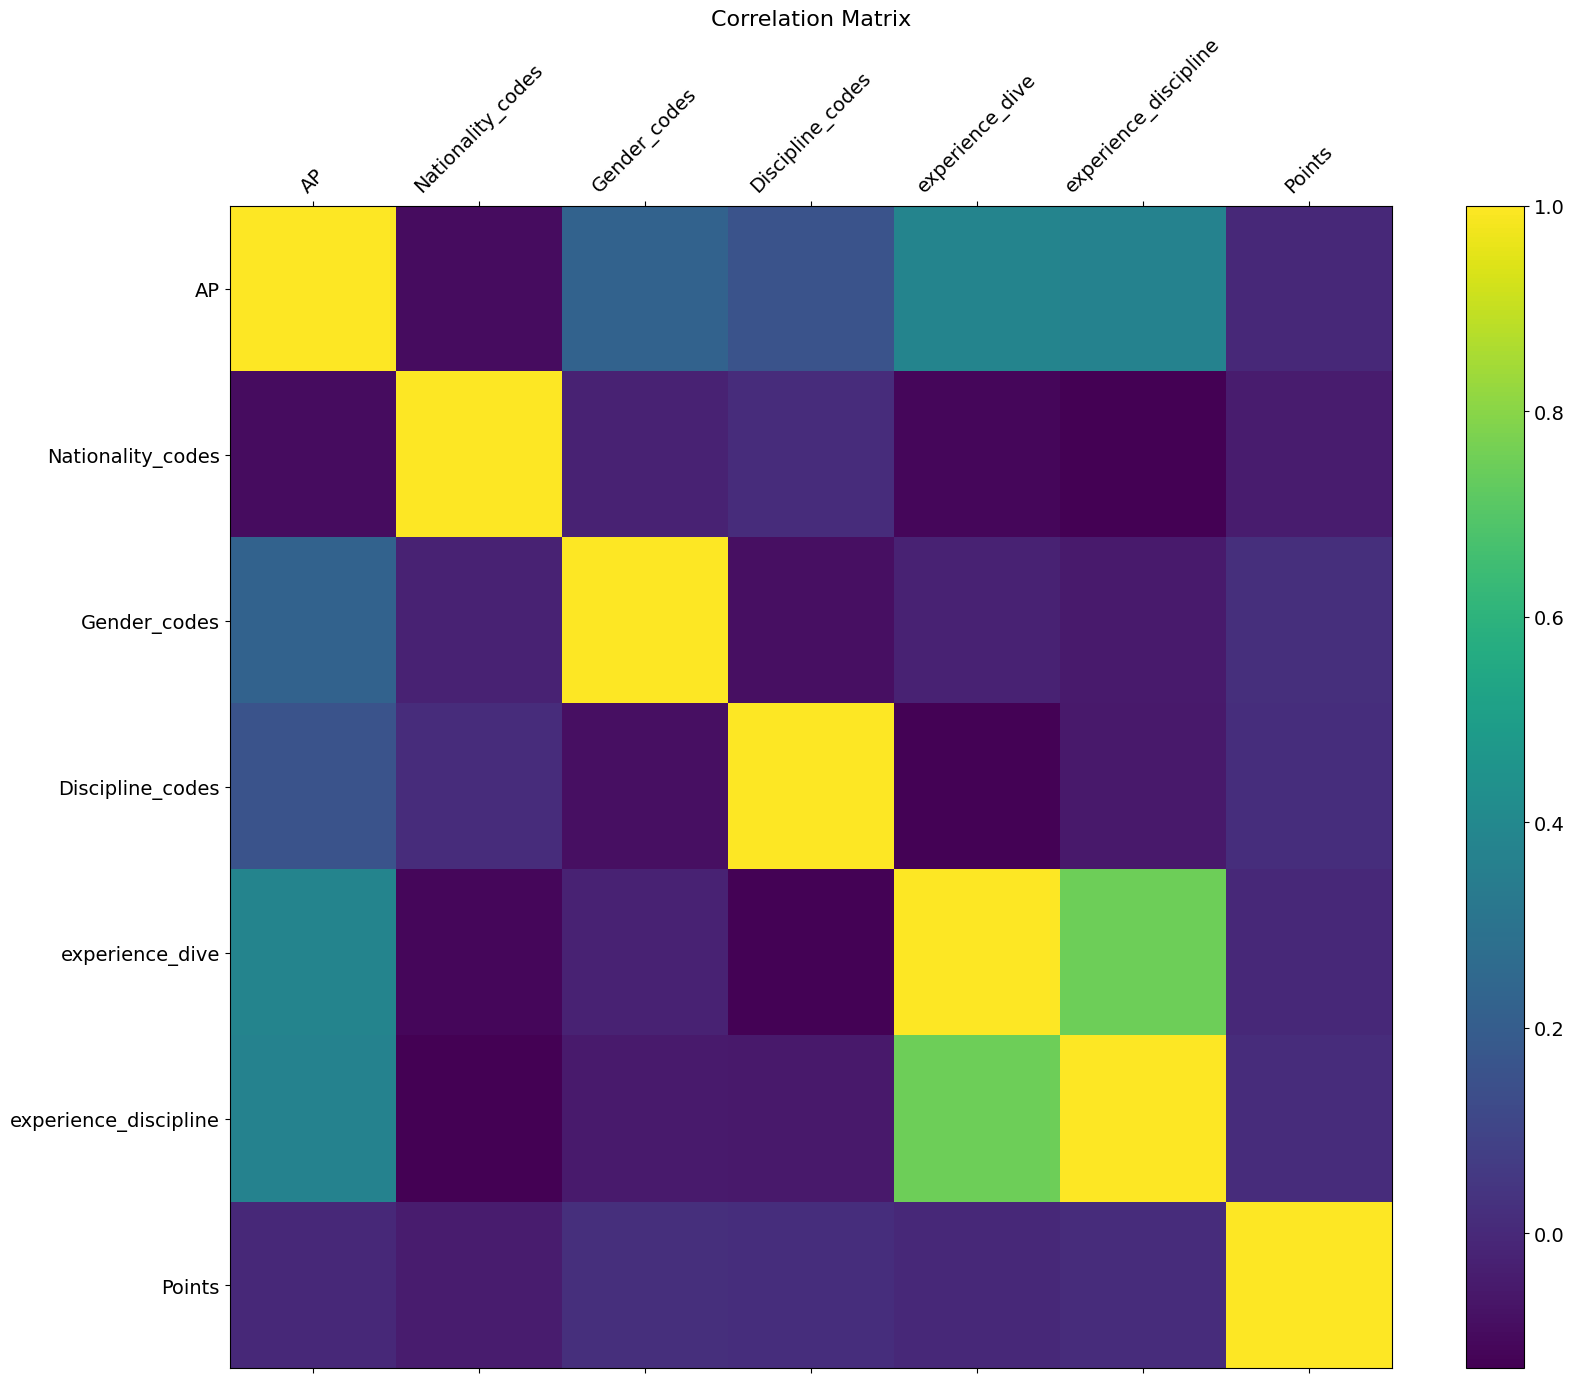

In [52]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_red_means.corr(), fignum=f.number)
plt.xticks(range(df_red_means.select_dtypes(['number']).shape[1]), df_red_means.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_red_means.select_dtypes(['number']).shape[1]), df_red_means.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

- **Contexte** : Analyser les corrélations entre les différentes caractéristiques du dataset.
- **Axes** :
  - Les deux axes listent les variables du dataset, et les couleurs indiquent la corrélation entre elles (de -1 à +1).
- **Données utilisées** : Variables numériques et variables catégoriques encodées.
- **Observations** :
  - Forte corrélation positive entre `experience_dive` et `experience_discipline`, logique puisque les deux mesurent une forme d'expérience.
  - Relation intéressante entre `Points` et `experience_dive`, suggérant que plus d'expérience conduit généralement à de meilleurs scores.
  - Faible corrélation entre `Nationality_codes` et la plupart des autres variables, montrant que la nationalité a peu d’impact direct.
- **Lien avec le problème** :
  - Permet d’identifier les variables les plus pertinentes pour la modélisation ou les clusters.


In [53]:
from sklearn.cluster import KMeans

# Initialisation du modèle K-means
kmeans_red = KMeans(n_clusters=3, random_state=42)  # Ajustez le nombre de clusters si nécessaire
clusters_red = kmeans_red.fit(df_red_means)

# Ajout des clusters au DataFrame
df_red_means['Cluster'] = clusters_red


In [54]:
df_red_means.columns

Index(['AP', 'Nationality_codes', 'Gender_codes', 'Discipline_codes',
       'experience_dive', 'experience_discipline', 'Points', 'Cluster'],
      dtype='object')

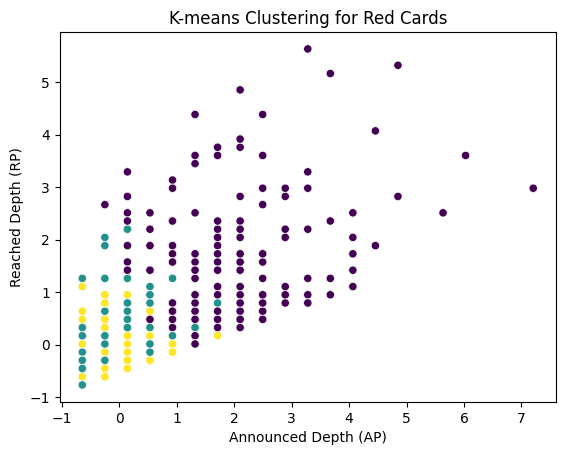

In [55]:
sns.scatterplot(x=df_red_means['experience_discipline'], y=df_red_means['experience_dive'], c=clusters_red.labels_, alpha=1)
plt.title('K-means Clustering for Red Cards')
plt.xlabel('Announced Depth (AP)')
plt.ylabel('Reached Depth (RP)')
plt.show()

- **Contexte** : Regrouper les plongées échouées (cartons rouges) pour comprendre leurs caractéristiques.
- **Axes** :
  - Axe X : Profondeur annoncée (`AP`).
  - Axe Y : Profondeur atteinte (`RP`).
- **Données utilisées** : Plongées ayant reçu un carton rouge, normalisées.
- **Observations** :
  - Les clusters identifiés révèlent des groupes distincts : des plongeurs ayant à peine atteint la profondeur annoncée et ceux qui l’ont dépassée.
  - Cela peut refléter différents profils d’échecs (manque de préparation, erreurs techniques ou conditions défavorables).
- **Lien avec le problème** :
  - Comprendre les caractéristiques des plongées échouées permet d'améliorer les stratégies d'entraînement et d'évaluation.


### DBSCAN

In [56]:
df_red_db = df[df['target'] == 'RED'].drop('target', axis=1)

df_red_db = df_red_db.drop(columns='Nationality')
df_red_db = df_red_db.drop(columns='Gender')
df_red_db = df_red_db.drop(columns='Discipline')
df_red_db.to_csv('dbscan.csv')



Text(0.5, 1.0, 'Correlation Matrix')

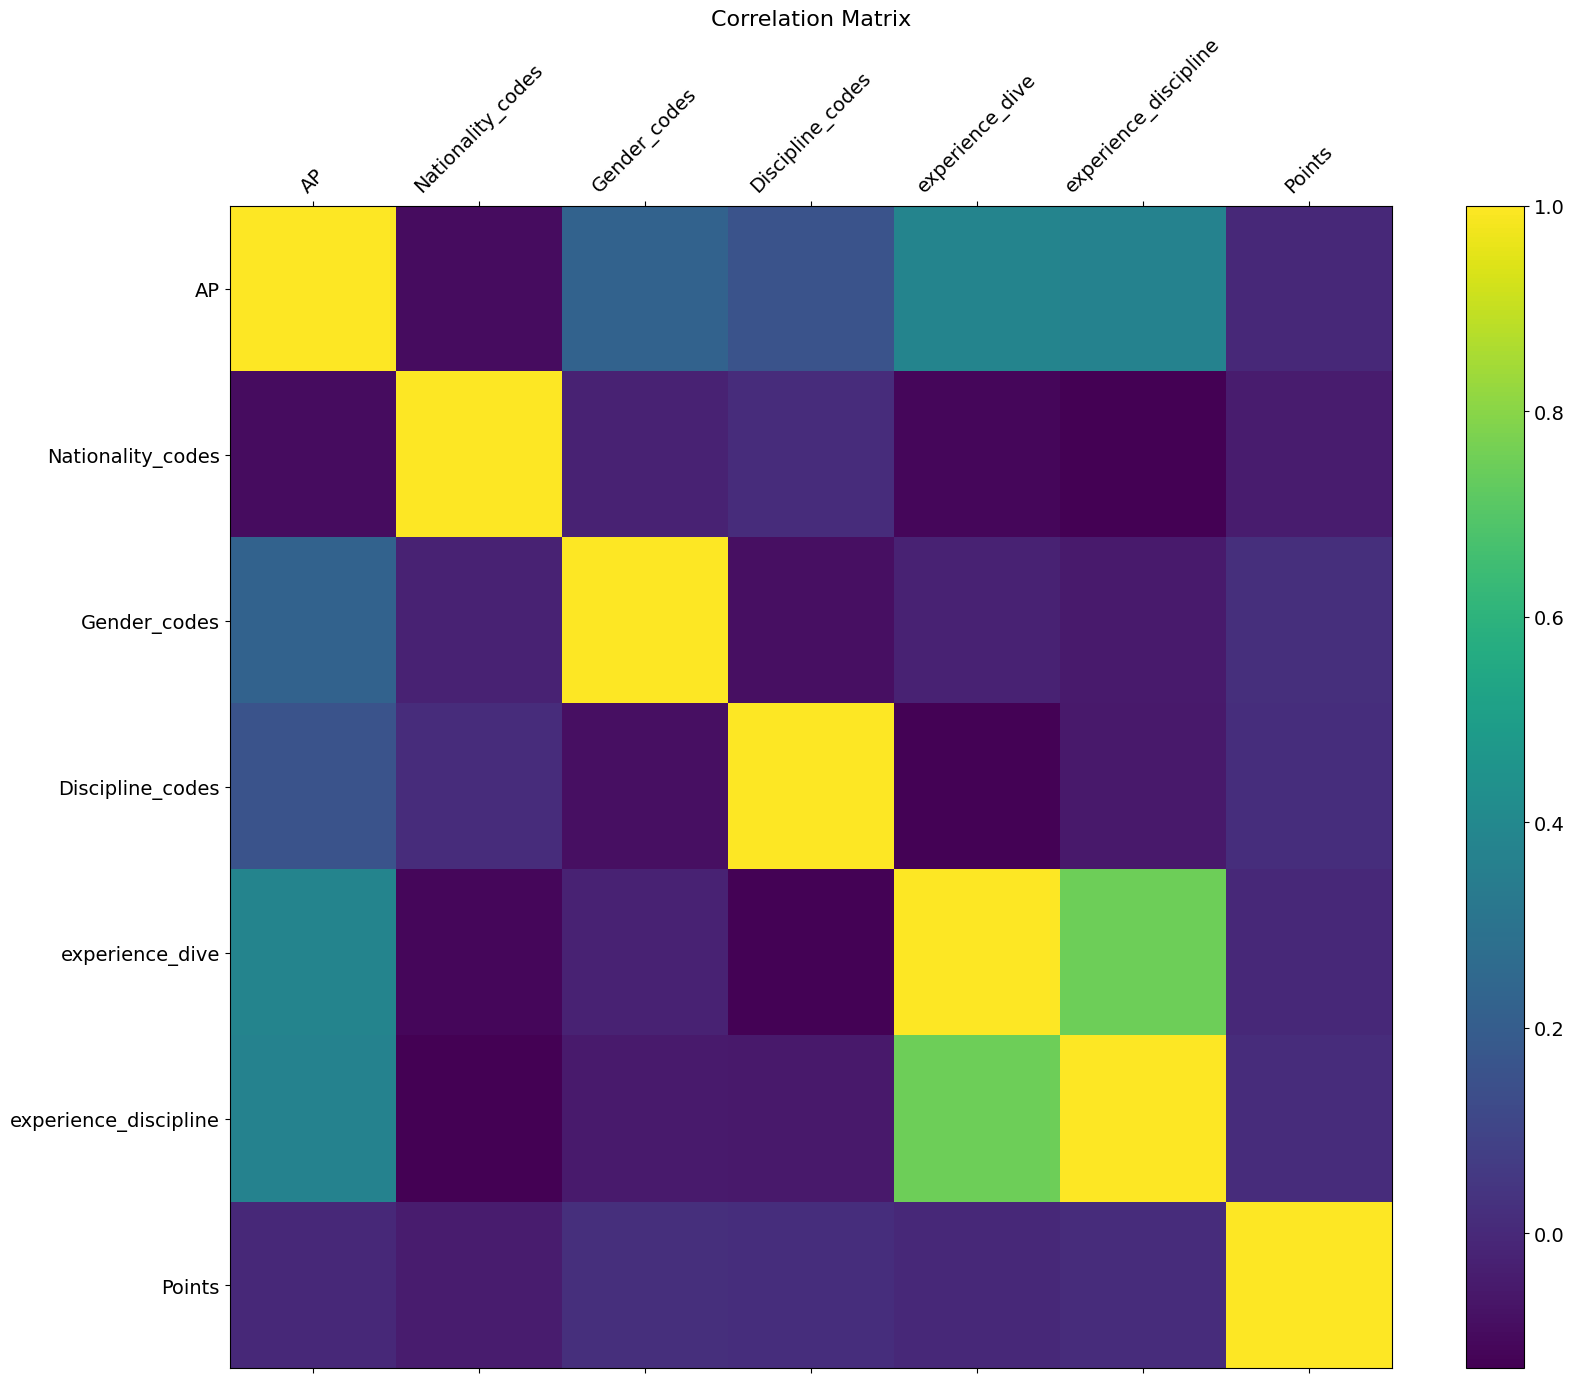

In [57]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_red_db.corr(), fignum=f.number)
plt.xticks(range(df_red_db.select_dtypes(['number']).shape[1]), df_red_db.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_red_db.select_dtypes(['number']).shape[1]), df_red_db.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

- **Contexte** : Analyser les corrélations entre les différentes caractéristiques du dataset.
- **Axes** :
  - Les deux axes listent les variables du dataset, et les couleurs indiquent la corrélation entre elles (de -1 à +1).
- **Données utilisées** : Variables numériques et variables catégoriques encodées.
- **Observations** :
  - Forte corrélation positive entre `experience_dive` et `experience_discipline`, logique puisque les deux mesurent une forme d'expérience.
  - Relation intéressante entre `Points` et `experience_dive`, suggérant que plus d'expérience conduit généralement à de meilleurs scores.
  - Faible corrélation entre `Nationality_codes` et la plupart des autres variables, montrant que la nationalité a peu d’impact direct.
- **Lien avec le problème** :
  - Permet d’identifier les variables les plus pertinentes pour la modélisation ou les clusters.


In [58]:
from sklearn.neighbors import NearestNeighbors

# Implement k nearest neighbours
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_red_db)



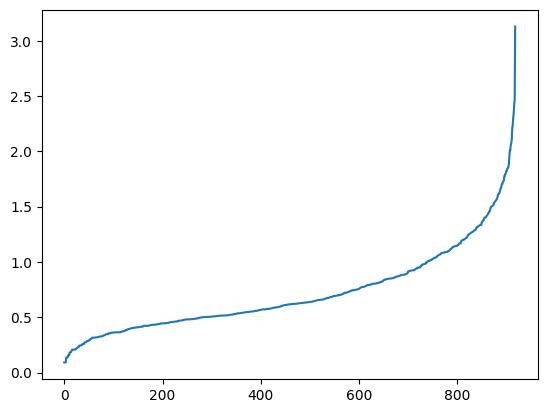

In [59]:
# extract distances and indices of data points
distances, indices = neighbors_fit.kneighbors(df_red_db)

# Sort distances to kth nearest neighbour by ascending value 
distances = np.sort(distances, axis=0)
distances = distances[:, 3]

# plot distance
plt.plot(distances)

- **Contexte** : Ce graphique aide à déterminer le bon paramètre epsilon (`eps`) pour l'algorithme de clustering DBSCAN.
- **Axes** :
  - Axe X : Points de données triés (indice des points).
  - Axe Y : Distance au plus proche voisin.
- **Données utilisées** : Distances calculées entre chaque point et son voisin le plus proche.
- **Observations** :
  - On observe une courbe croissante avec un "genou" marqué vers la fin.
  - Ce "genou" indique la valeur optimale d'`eps`, au-delà de laquelle les points commencent à être considérés comme du bruit.
- **Lien avec le problème** :
  - Identifier un bon `eps` permet de former des clusters significatifs tout en excluant les points bruyants ou atypiques.


In [60]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=1.75, min_samples=14).fit(df_red_db)

# Extract labels
labels = dbscan.labels_

# Add clusters to original dataframe
df_red_db['Cluster'] = labels

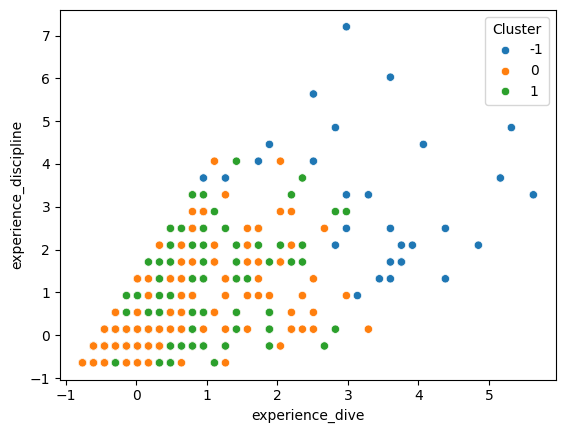

In [61]:
sns.scatterplot(x='experience_dive', y='experience_discipline', hue='Cluster', palette = 'tab10', data = df_red_db)
plt.show()

- **Contexte** : Visualisation des clusters formés par DBSCAN en fonction de l'expérience totale (`experience_dive`) et de l'expérience spécifique à une discipline (`experience_discipline`).
- **Axes** :
  - Axe X : Expérience générale en plongées (`experience_dive`).
  - Axe Y : Expérience spécifique à une discipline (`experience_discipline`).
- **Données utilisées** : Points normalisés en termes d'expérience totale et spécifique, regroupés par clusters.
- **Observations** :
  - **Cluster -1** (en bleu) représente des points considérés comme du bruit ou des plongées atypiques.
  - Les clusters 0 (orange) et 1 (vert) montrent des groupes homogènes d'expérience.
  - Une tendance linéaire est visible : l'expérience totale et spécifique évoluent souvent ensemble.
- **Lien avec le problème** :
  - Aide à identifier les profils de plongeurs (novices vs expérimentés) et leurs résultats probables.


DBSCAN detects 2 clusters. The blue points "-1" is the noise

In [62]:
# extract the mean experience_dive, the mean experience_discipline and count of each cluster
cluster_stats = df_red_db.groupby('Cluster').mean()
cluster_counts = df_red_db.groupby('Cluster').count()
cluster_stats['Count'] = cluster_counts['experience_dive']

# display dataframe
cluster_stats

,AP,Nationality_codes,Gender_codes,Discipline_codes,experience_dive,experience_discipline,Points,Count
Cluster,,,,,,,,
-1,1.212374,0.078149,0.161475,-0.334770,3.241526,3.153550,-1.725644,31
0,0.328355,0.040367,0.819466,-0.330219,-0.096041,-0.047968,-1.724983,592
1,-0.150942,0.052314,-1.220306,-0.157060,-0.008821,0.074019,-1.725644,296


### 3.2) Target = White

### KMeans

In [63]:
df_white_means = df[df['target'] == 'WHITE'].drop('target', axis=1)


In [64]:
df_white_means = df_white_means.drop(columns='Nationality')
df_white_means = df_white_means.drop(columns='Gender')
df_white_means = df_white_means.drop(columns='Discipline')

In [65]:
df_white_means

,AP,Nationality_codes,Gender_codes,Discipline_codes,experience_dive,experience_discipline,Points
1,1.574681,-0.629913,0.819466,-0.702190,-0.608032,-0.644643,1.652987
2,1.029020,-0.629913,0.819466,-1.651359,-0.452037,-0.252163,1.226213
3,2.302230,-0.629913,0.819466,1.196146,-0.296042,-0.644643,2.222020
4,2.256758,-0.629913,0.819466,-0.702190,-0.140047,-0.252163,2.186456
5,0.437886,-0.629913,0.819466,-1.651359,0.015948,0.140317,0.763874
...,...,...,...,...,...,...,...
7907,-1.744759,-1.320929,-1.220306,0.246978,-0.764027,-0.644643,-0.943224
7909,0.210528,-1.442873,0.819466,0.246978,-0.608032,-0.644643,0.586051
7910,0.210528,-1.442873,0.819466,1.196146,-0.452037,-0.644643,0.586051
7911,-0.698908,0.183047,0.819466,0.246978,-0.764027,-0.644643,-0.125239


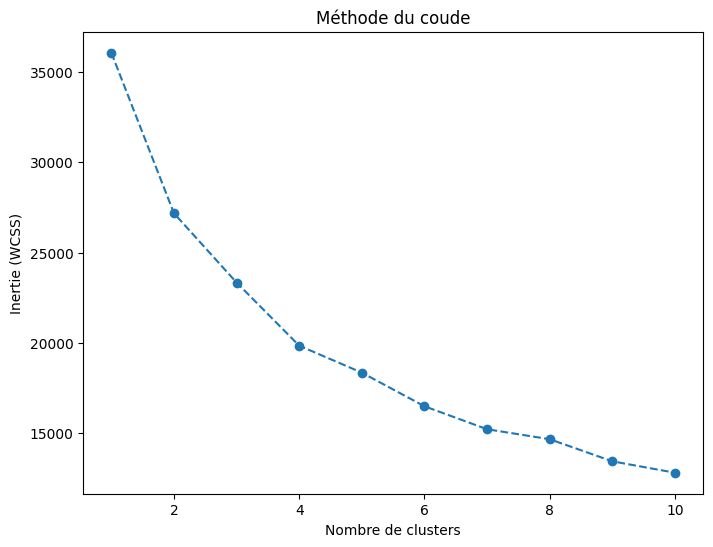

In [ ]:
from sklearn.cluster import KMeans

# We're looking for the optimal number of clusters with the Elbow method
wcss = []
clusters = list(range(1, 11))

for numbers_clusters in clusters:
    mod = KMeans(n_clusters=numbers_clusters, random_state=42)
    mod.fit(df_white_means)
    wcss.append(mod.inertia_)

# YOUR CODE HERE
plt.figure(figsize=(8, 6))
plt.plot(clusters, wcss, marker='o', linestyle='--')

plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie (WCSS)')

plt.show()



- **Contexte** : Trouver le nombre optimal de clusters pour l'algorithme K-Means.
- **Axes** :
  - Axe X : Nombre de clusters.
  - Axe Y : Inertie (Within-Cluster Sum of Squares, WCSS), mesurant la variance interne au cluster.
- **Données utilisées** : WCSS calculée pour chaque nombre de clusters testé.
- **Observations** :
  - On observe une forte diminution de l'inertie entre 1 et 3 clusters, indiquant que ces groupes expliquent une part importante de la variance.
  - Après 3 clusters, la diminution est moins prononcée ("coude"), ce qui suggère que 3 clusters pourraient être un bon choix.
- **Lien avec le problème** :
  - Identifier des groupes homogènes parmi les plongeurs ou plongées, ce qui peut enrichir l'analyse.


In [67]:
from sklearn.cluster import KMeans

# Initialisation du modèle K-means
kmeans_white = KMeans(n_clusters=3, random_state=42)  # Ajustez le nombre de clusters si nécessaire
clusters_white = kmeans_white.fit(df_white_means)

# Ajout des clusters au DataFrame
df_white_means['Cluster'] = clusters_white


In [68]:
df_white_means.columns

Index(['AP', 'Nationality_codes', 'Gender_codes', 'Discipline_codes',
       'experience_dive', 'experience_discipline', 'Points', 'Cluster'],
      dtype='object')

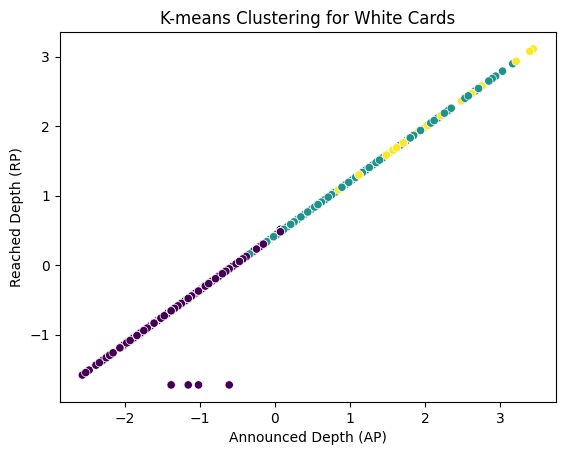

In [69]:
sns.scatterplot(x=df_white_means['AP'], y=df_white_means['Points'], c=clusters_white.labels_, alpha=1)
plt.title('K-means Clustering for White Cards')
plt.xlabel('Announced Depth (AP)')
plt.ylabel('Reached Depth (RP)')
plt.show()

- **Contexte** : Analyse des plongées ayant obtenu un carton blanc pour comprendre les caractéristiques des plongées réussies.
- **Axes** :
  - Axe X : Profondeur annoncée (`AP`).
  - Axe Y : Profondeur atteinte (`RP`).
- **Données utilisées** : Plongées réussies, normalisées.
- **Observations** :
  - Les points s'alignent fortement sur une diagonale, ce qui indique que les plongeurs atteignent souvent la profondeur annoncée.
  - Les clusters identifiés montrent de légères variations entre les plongeurs atteignant ou dépassant légèrement l'objectif.
- **Lien avec le problème** :
  - Permet d’identifier des tendances positives à reproduire pour améliorer les performances des plongeurs moins expérimentés.


### DBSCAN

In [70]:
df_white_db = df[df['target'] == 'WHITE'].drop('target', axis=1)

df_white_db = df_white_db.drop(columns='Nationality')
df_white_db = df_white_db.drop(columns='Gender')
df_white_db = df_white_db.drop(columns='Discipline')
df_white_db.to_csv('dbscan.csv')



Text(0.5, 1.0, 'Correlation Matrix')

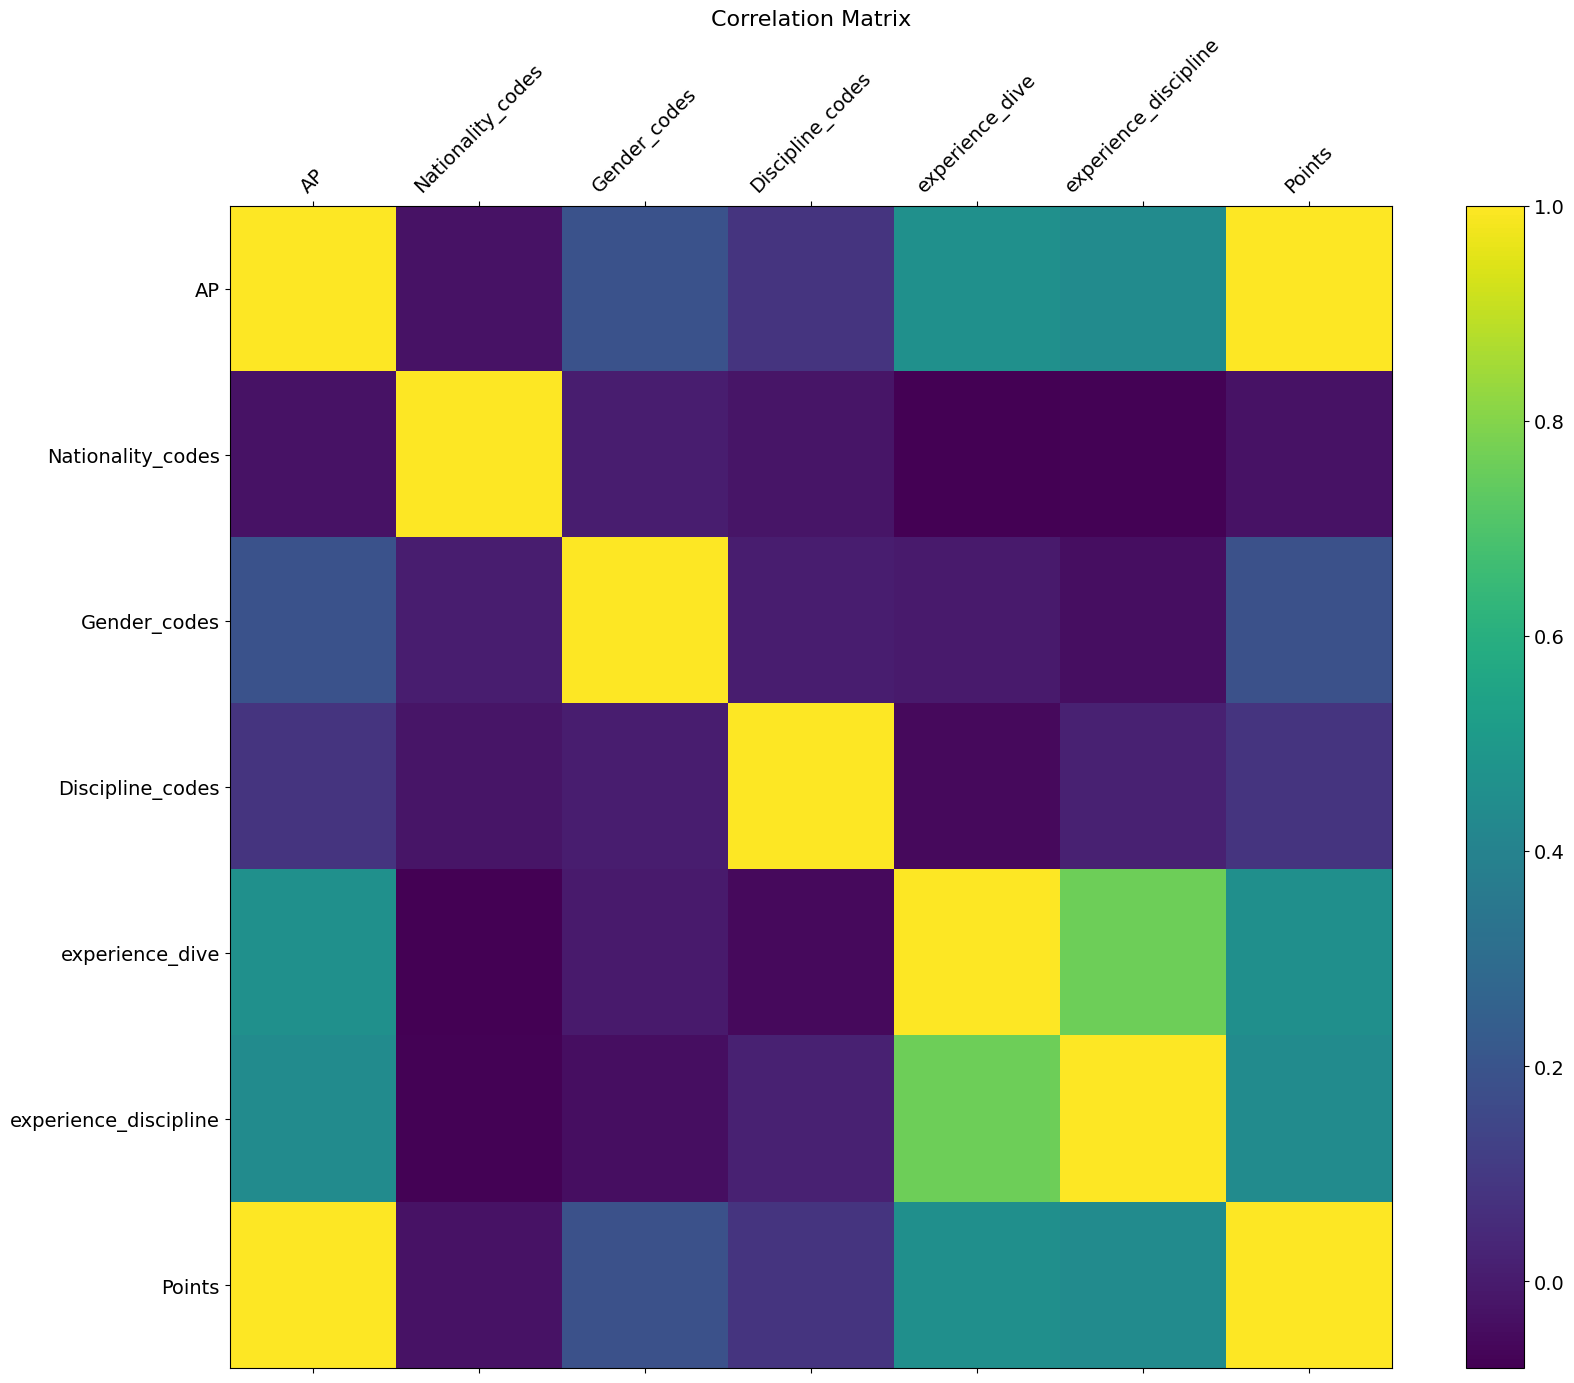

In [71]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_white_db.corr(), fignum=f.number)
plt.xticks(range(df_white_db.select_dtypes(['number']).shape[1]), df_white_db.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_white_db.select_dtypes(['number']).shape[1]), df_white_db.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

- **Contexte** : Analyser les corrélations entre les différentes caractéristiques du dataset.
- **Axes** :
  - Les deux axes listent les variables du dataset, et les couleurs indiquent la corrélation entre elles (de -1 à +1).
- **Données utilisées** : Variables numériques et catégoriques encodées.
- **Observations** :
  - Forte corrélation entre `experience_dive` et `experience_discipline`, ce qui est attendu.
  - Relation entre `Points` et `experience_dive`, montrant que plus d'expérience mène souvent à de meilleurs scores.
  - Faible corrélation entre `Nationality_codes` et les autres variables, montrant un impact limité de la nationalité.
- **Lien avec le problème** :
  - Permet d’identifier les variables les plus pertinentes pour la modélisation ou le clustering.


In [72]:
from sklearn.neighbors import NearestNeighbors

# Implement k nearest neighbours
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_white_db)



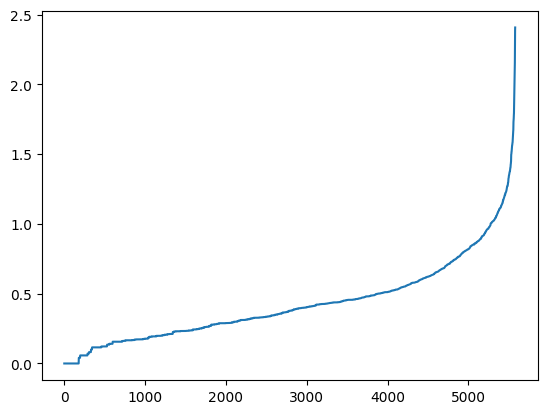

In [73]:
# extract distances and indices of data points
distances, indices = neighbors_fit.kneighbors(df_white_db)

# Sort distances to kth nearest neighbour by ascending value 
distances = np.sort(distances, axis=0)
distances = distances[:, 3]

# plot distance
plt.plot(distances)

- **Contexte** : Ce graphique aide à déterminer le bon paramètre epsilon (`eps`) pour l'algorithme de clustering DBSCAN.
- **Axes** :
  - Axe X : Points de données triés (indices des points).
  - Axe Y : Distance au plus proche voisin.
- **Données utilisées** : Distances calculées entre chaque point et son voisin le plus proche.
- **Observations** :
  - Une courbe croissante avec un "genou" marqué vers la fin.
  - Le "genou" indique la valeur optimale d'`eps` pour le clustering.
- **Lien avec le problème** :
  - Ajuster DBSCAN pour détecter correctement les clusters tout en excluant le bruit.


In [74]:
df_red_db

,AP,Nationality_codes,Gender_codes,Discipline_codes,experience_dive,experience_discipline,Points,Cluster
20,1.165435,-0.629913,0.819466,-1.651359,2.355876,2.102717,-1.725644,0
28,1.938455,-0.629913,0.819466,0.246978,3.603837,1.317757,-1.725644,-1
31,-1.244570,-0.792505,0.819466,1.196146,-0.608032,-0.644643,-1.725644,0
32,-1.244570,-0.792505,0.819466,-0.702190,-0.452037,-0.644643,-1.725644,0
39,0.255999,0.264343,0.819466,-0.702190,-0.296042,-0.644643,-1.725644,0
...,...,...,...,...,...,...,...,...
7868,0.483358,-1.198985,0.819466,-1.651359,0.171944,0.925277,-1.725644,0
7872,1.347322,1.565079,0.819466,1.196146,-0.608032,-0.252163,-1.725644,0
7897,-0.016831,-1.198985,0.819466,0.246978,-0.764027,-0.644643,-1.725644,0
7898,-0.016831,-1.198985,0.819466,0.246978,-0.608032,-0.252163,-1.725644,0


In [75]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=0.8, min_samples=14).fit(df_white_db)

# Extract labels
labels = dbscan.labels_

# Add clusters to original dataframe
df_white_db['Cluster'] = labels

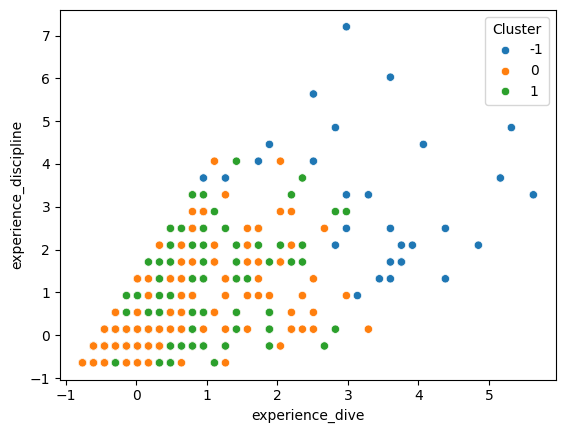

In [76]:
sns.scatterplot(x='experience_dive', y='experience_discipline', hue='Cluster', palette = 'tab10', data = df_red_db)
plt.show()

- **Contexte** : Visualisation des clusters formés par DBSCAN en fonction de l'expérience totale (`experience_dive`) et de l'expérience spécifique à une discipline (`experience_discipline`).
- **Axes** :
  - Axe X : Expérience générale en plongées (`experience_dive`).
  - Axe Y : Expérience spécifique à une discipline (`experience_discipline`).
- **Données utilisées** : Points normalisés selon l'expérience totale et spécifique, regroupés par clusters.
- **Observations** :
  - **Cluster -1** (en bleu) représente des plongées atypiques ou du bruit.
  - Les clusters 0 (orange) et 1 (vert) montrent des groupes homogènes d'expérience.
  - Une tendance linéaire indique que l'expérience totale et spécifique évoluent souvent ensemble.
- **Lien avec le problème** :
  - Aide à identifier les profils de plongeurs (novices vs expérimentés) et leurs performances respectives.


DBSCAN detects 2 clusters. The blue points "-1" is the noise

In [77]:
# extract the mean experience_dive, the mean experience_discipline and count of each cluster
cluster_stats = df_white_db.groupby('Cluster').mean()
cluster_counts = df_white_db.groupby('Cluster').count()
cluster_stats['Count'] = cluster_counts['experience_dive']

# display dataframe
cluster_stats

,AP,Nationality_codes,Gender_codes,Discipline_codes,experience_dive,experience_discipline,Points,Count
Cluster,,,,,,,,
-1,0.833039,-0.121773,-0.101016,-0.005578,1.522077,1.299778,1.065653,1026
0,0.366211,0.078174,0.819466,-0.702190,-0.308674,-0.345294,0.707815,531
1,-0.678446,0.042723,0.819466,-1.651359,-0.352336,-0.455229,-0.109235,460
2,-0.203152,0.006245,0.819466,0.246978,-0.429222,-0.371634,0.262503,841
3,-0.102435,0.024189,0.819466,1.196146,-0.415034,-0.393182,0.341276,860
4,-0.070041,0.116058,-1.220306,-0.702190,-0.253498,-0.309800,0.366695,429
5,-1.002809,0.120267,-1.220306,-1.651359,-0.298818,-0.463069,-0.362927,281
6,-0.569871,-0.004317,-1.220306,1.196146,-0.424370,-0.394345,-0.024317,530
7,-0.612431,-0.013451,-1.220306,0.246978,-0.480171,-0.366558,-0.057604,621


## Classification

1. Prédire si le résultat d’une plongée va être un carton blanc, jaune, rouge selon les
caractéristiques. Utiliser le classifieur SVM avec différents noyaux.


In [78]:
# Import usual libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [79]:


# Encode categorical variables
categorical_cols = ['Nationality', 'Gender', 'Discipline']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Normalize numerical columns
numerical_cols = ['AP', 'experience_dive', 'experience_discipline', 'Points']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split the data
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [80]:
df

,AP,Nationality,Nationality_codes,Gender,Gender_codes,Discipline,Discipline_codes,experience_dive,experience_discipline,Points,target
0,0.528830,31,-0.629913,1,0.819466,0,-1.651359,-0.764027,-0.644643,0.657180,YELLOW
1,1.574681,31,-0.629913,1,0.819466,1,-0.702190,-0.608032,-0.644643,1.652987,WHITE
2,1.029020,31,-0.629913,1,0.819466,0,-1.651359,-0.452037,-0.252163,1.226213,WHITE
3,2.302230,31,-0.629913,1,0.819466,3,1.196146,-0.296042,-0.644643,2.222020,WHITE
4,2.256758,31,-0.629913,1,0.819466,1,-0.702190,-0.140047,-0.252163,2.186456,WHITE
...,...,...,...,...,...,...,...,...,...,...,...
7908,0.028640,11,-1.442873,1,0.819466,0,-1.651359,-0.764027,-0.644643,-1.725644,RED
7909,0.210528,11,-1.442873,1,0.819466,2,0.246978,-0.608032,-0.644643,0.586051,WHITE
7910,0.210528,11,-1.442873,1,0.819466,3,1.196146,-0.452037,-0.644643,0.586051,WHITE
7911,-0.698908,51,0.183047,1,0.819466,2,0.246978,-0.764027,-0.644643,-0.125239,WHITE


              precision    recall  f1-score   support

         RED       0.89      1.00      0.94       283
       WHITE       0.99      1.00      0.99      1678
      YELLOW       1.00      0.88      0.94       413

    accuracy                           0.98      2374
   macro avg       0.96      0.96      0.96      2374
weighted avg       0.98      0.98      0.98      2374



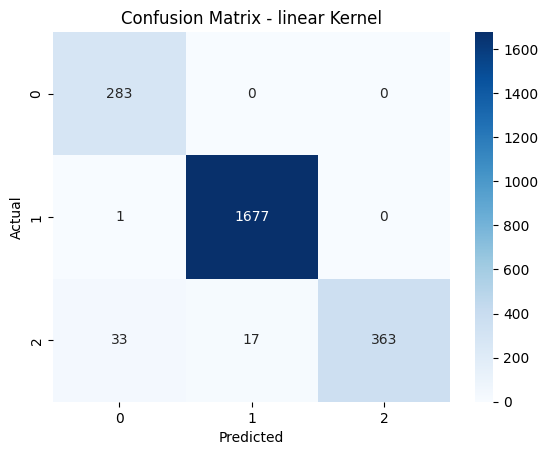

              precision    recall  f1-score   support

         RED       0.82      0.31      0.45       283
       WHITE       0.76      1.00      0.86      1678
      YELLOW       0.45      0.06      0.11       413

    accuracy                           0.75      2374
   macro avg       0.68      0.46      0.47      2374
weighted avg       0.71      0.75      0.68      2374



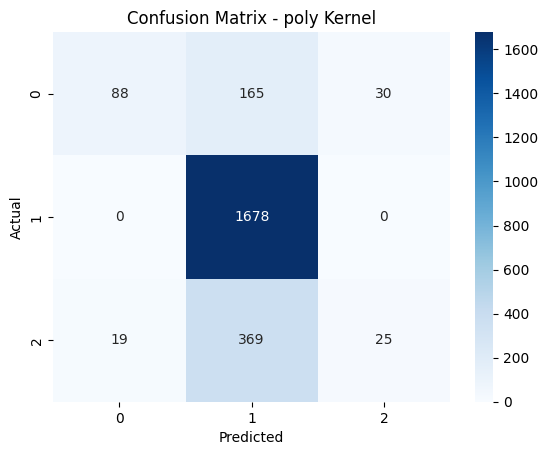

              precision    recall  f1-score   support

         RED       0.86      0.46      0.60       283
       WHITE       0.76      1.00      0.87      1678
      YELLOW       0.07      0.00      0.01       413

    accuracy                           0.76      2374
   macro avg       0.57      0.49      0.49      2374
weighted avg       0.66      0.76      0.69      2374



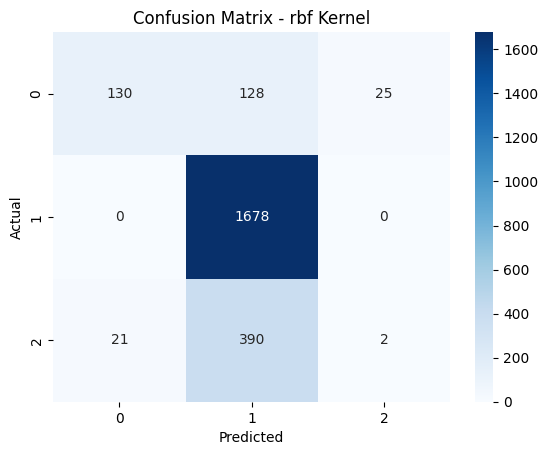

Kernel: linear, Accuracy: 0.9785172704296546
Kernel: poly, Accuracy: 0.7544229149115417
Kernel: rbf, Accuracy: 0.7624262847514743


In [81]:
kernels = ['linear', 'poly', 'rbf']
results = []

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Evaluate and store metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(report)
    results.append({'Kernel': kernel, 'Accuracy': acc, 'Report': report})

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {kernel} Kernel")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Summarize results
for res in results:
    print(f"Kernel: {res['Kernel']}, Accuracy: {res['Accuracy']}")


1) - **Contexte** : Évaluer les performances d’un modèle SVM avec un noyau linéaire pour prédire les cartons.
- **Axes** :
  - Axe X : Prédictions (0 : Blanc, 1 : Jaune, 2 : Rouge).
  - Axe Y : Classes réelles (0 : Blanc, 1 : Jaune, 2 : Rouge).
- **Données utilisées** : Cartons prédits et réels.
- **Observations** :
  - Très bonne prédiction pour les cartons jaunes (1677 bien classifiés).
  - Quelques confusions pour les cartons rouges (33 rouges prédits comme blancs).
- **Lien avec le problème** :
  - Vérifie la capacité du modèle à prédire correctement les résultats des plongées.


2) - **Contexte** : Évaluer les performances du modèle SVM avec un noyau polynomial.
- **Axes** :
  - Axe X : Prédictions (0 : Blanc, 1 : Jaune, 2 : Rouge).
  - Axe Y : Classes réelles (0 : Blanc, 1 : Jaune, 2 : Rouge).
- **Observations** :
  - Moins performant que le noyau linéaire : beaucoup de confusions entre blancs et jaunes (165 blancs prédits comme jaunes).
  - Les cartons rouges sont aussi mal classifiés (19 rouges prédits comme jaunes).
- **Lien avec le problème** :
  - Ce modèle est moins adapté pour différencier les classes de cartons.


3) - **Contexte** : Évaluation du modèle SVM avec un noyau RBF.
- **Axes** :
  - Axe X : Prédictions (0 : Blanc, 1 : Jaune, 2 : Rouge).
  - Axe Y : Classes réelles (0 : Blanc, 1 : Jaune, 2 : Rouge).
- **Observations** :
  - Meilleures prédictions pour les cartons jaunes, mais encore des confusions notables entre rouges et jaunes (390 rouges prédits comme jaunes).
  - Quelques erreurs pour les cartons blancs également (130 blancs prédits comme jaunes).
- **Lien avec le problème** :
  - Le noyau RBF montre des résultats mixtes, avec des performances limitées pour les classes rouges.


Random Forest Accuracy: 0.951558550968829
              precision    recall  f1-score   support

         RED       0.91      0.98      0.94       283
       WHITE       0.96      1.00      0.98      1678
      YELLOW       0.97      0.74      0.84       413

    accuracy                           0.95      2374
   macro avg       0.95      0.91      0.92      2374
weighted avg       0.95      0.95      0.95      2374



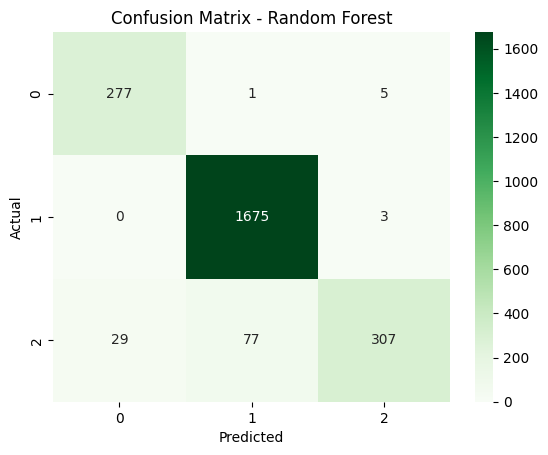

KNN Accuracy: 0.8192923336141533
              precision    recall  f1-score   support

         RED       0.82      0.77      0.80       283
       WHITE       0.84      0.97      0.90      1678
      YELLOW       0.60      0.23      0.33       413

    accuracy                           0.82      2374
   macro avg       0.75      0.66      0.68      2374
weighted avg       0.79      0.82      0.79      2374



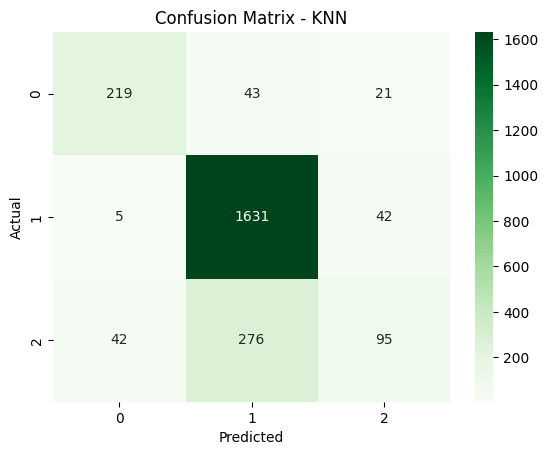

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate both models
models = {'Random Forest': y_pred_rf, 'KNN': y_pred_knn}
for model, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    print(f"{model} Accuracy: {acc}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f"Confusion Matrix - {model}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


1) - **Contexte** : Évaluer les performances du modèle Random Forest pour prédire les cartons.
- **Axes** :
  - Axe X : Prédictions (0 : Blanc, 1 : Jaune, 2 : Rouge).
  - Axe Y : Classes réelles (0 : Blanc, 1 : Jaune, 2 : Rouge).
- **Observations** :
  - Bonne performance globale avec 1675 cartons jaunes bien prédits.
  - Quelques erreurs pour les cartons rouges et blancs (29 rouges classés comme blancs, 77 rouges comme jaunes).
- **Lien avec le problème** :
  - Ce modèle est globalement performant, mais les confusions rouges/blancs restent à améliorer.


2) - **Contexte** : Évaluer les performances du modèle K-Nearest Neighbors (KNN) pour prédire les cartons.
- **Axes** :
  - Axe X : Prédictions (0 : Blanc, 1 : Jaune, 2 : Rouge).
  - Axe Y : Classes réelles (0 : Blanc, 1 : Jaune, 2 : Rouge).
- **Observations** :
  - Des erreurs fréquentes pour les cartons rouges (276 rouges classés comme jaunes).
  - Les cartons blancs montrent aussi des confusions (43 blancs classés comme jaunes).
- **Lien avec le problème** :
  - Le modèle KNN est moins performant dans la distinction entre classes, notamment pour les cartons rouges.


In [83]:
import pandas as pd

# Combine all results into a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Model': ['SVM (Linear)', 'Random Forest', 'KNN'],
    'Accuracy': [
        results[0]['Accuracy'],
        accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_knn)
    ]
})

print(results_df)


           Model  Accuracy
0   SVM (Linear)  0.978517
1  Random Forest  0.951559
2            KNN  0.819292


### **1. Prétraitement des données**
Cette étape prépare le jeu de données pour qu’il soit utilisable par les algorithmes d’apprentissage automatique.

- **Encodage des variables catégorielles** :  
  Les données catégorielles (par exemple, le genre, la discipline, la nationalité) doivent être converties en valeurs numériques, car les modèles d’apprentissage automatique ne travaillent qu’avec des entrées numériques. On utilise des techniques comme l’encodage par étiquettes (*label encoding*) ou l’encodage *one-hot* pour cela.

- **Normalisation des variables numériques** :  
  Les données numériques (par exemple, la profondeur, l'expérience) sont mises à l’échelle pour avoir une moyenne de 0 et un écart-type de 1. Cela permet d’éviter que les variables ayant de grandes amplitudes ne dominent les autres dans le modèle.

- **Division des données** :  
  On divise le jeu de données en deux parties :
  - **Jeu d’entraînement** : Utilisé pour entraîner le modèle.
  - **Jeu de test** : Utilisé pour évaluer les performances du modèle sur des données inédites.


### **2. Classification avec un SVM**
Le **Support Vector Machine (SVM)** est un algorithme couramment utilisé pour les tâches de classification.

- **Entraînement avec différents noyaux** :  
  Le SVM utilise des "noyaux" pour transformer les données dans des dimensions supérieures, où une frontière linéaire peut être trouvée. Les noyaux les plus courants sont :
  - **Linéaire** : Pour des données séparables linéairement.
  - **Polynomial (poly)** : Pour capturer des relations polynomiales.
  - **Radial Basis Function (rbf)** : Pour des motifs complexes et non linéaires.

- **Évaluation des performances** :  
  Les performances sont mesurées à l’aide de métriques comme :
  - **Précision (accuracy)** : Pourcentage de prédictions correctes.
  - **Précision (precision) et rappel (recall)** : Mesures de la qualité des prédictions positives.
  - **Matrice de confusion** : Tableau montrant les vraies classes par rapport aux classes prédites, pour une analyse détaillée.


### **3. Résumé des performances**
Cette étape compile les résultats des différents noyaux SVM dans un tableau récapitulatif. On y inclut des métriques comme la précision, la précision et le rappel pour chaque type de noyau.

- **Visualisations** :  
  - **Matrices de confusion** : Montrent la répartition des prédictions correctes et incorrectes pour chaque classe.
  - **Frontières de décision** : Si applicable, visualiser les régions de décision aide à expliquer comment le modèle sépare les classes.

Cela permet de justifier quel noyau a donné les meilleurs résultats et pourquoi.


### **4. Expérimentation avec d’autres classifieurs**
Pour assurer la robustesse des résultats, on teste des classifieurs supplémentaires et on compare leurs performances avec le meilleur SVM.

- **Random Forest** :  
  Une méthode d’ensemble qui construit plusieurs arbres de décision et moyenne leurs résultats pour améliorer la précision et réduire le surapprentissage.

- **K-Nearest Neighbors (KNN)** :  
  Un algorithme simple basé sur la distance, qui prédit une classe en fonction de la classe majoritaire parmi ses voisins les plus proches.

- **Comparaison des performances** :  
  On utilise des métriques comme la précision, la précision et les matrices de confusion pour comparer ces classifieurs au SVM.


### **5. Commentaires**
Cette étape consiste à interpréter et à expliquer les résultats obtenus :

- **Analyse des résultats** :
  - Quel modèle a obtenu les meilleures performances, et pourquoi ? Par exemple :
    - Le SVM avec un noyau RBF peut mieux gérer les données complexes.
    - Le Random Forest peut être plus performant avec des données déséquilibrées.
  - Identifier les tendances, comme l’influence de l’expérience ou des disciplines sur les prédictions.

- **Recommandations** :
  - Suggérer des techniques pour améliorer les performances, comme l’ajustement des hyperparamètres, l’utilisation d’un jeu de données plus large ou la sélection de caractéristiques pertinentes.

- **Perspectives futures** :
  Explorer des modèles plus avancés, comme les réseaux neuronaux, ou tester des techniques complémentaires pour optimiser les résultats.
